In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

###################################################
%config InlineBackend.figure_format = 'retina'

%matplotlib inline

import os
import numpy as np

import matplotlib.pyplot as plt
plt.ion()

from matplotlib import rc
import matplotlib as mpl

import matplotlib.gridspec as gridspec

from scipy import interpolate

import itertools

import warnings

######################################################

import matplotlib.ticker as ticker
import matplotlib.colors as mcolors

plt.rc('text', usetex=True)
mpl.rcParams['errorbar.capsize'] = 3
colors_fig_errors = list(mcolors.TABLEAU_COLORS.values())
colors_fig = list(mcolors.TABLEAU_COLORS.values())


######################################################

from sympy import *

## The way to evaluate a custom user defined function in a numpy array

- lambdify takes the variable, the function and 'numpy'

f = lambdify(x, U_N, 'numpy')

- the numpy array     

a = np.linspace(1,100000000,500)/10000000.0


- the function evaluated 

f(a)


In [2]:
x, kB, T, N, n, E, mu = symbols("x k_B T N n E mu")

In [3]:
E_mu_kBT = np.linspace(-45000000,45000000,500)/10000000.0

In [4]:
f_FD = 1.0/(exp(x) + 1.0)
f_BE = 1.0/(exp(x) - 1.0)
f_MX = exp(-x)

In [5]:
f_FD_values = lambdify([x], f_FD, 'numpy')
f_BE_values = lambdify([x], f_BE, 'numpy')
f_MX_values = lambdify([x], f_MX, 'numpy')

In [6]:
f_FD_T0 = 1.0/(exp(x) + 1.0)
f_FD_T1 = 1.0/(exp(x) + 1.0)
f_FD_T2 = 1.0/(exp(x) + 1.0)
f_FD_T0_values = lambdify([x], f_FD_T0, 'numpy')
f_FD_T1_values = lambdify([x], f_FD_T1, 'numpy')
f_FD_T2_values = lambdify([x], f_FD_T2, 'numpy')



$\frac{E-\mu}{k_{\textrm{B}}T}$

<br>

<br>

$T = \frac{0.01\cdot\mu}{k_{\textrm{B}}}$

In [7]:
#efermi = 5.0
epsilon = np.linspace(0.00001,9,1000)
t_mu = np.linspace(0.00001,11,1000)

temperatures = [0.05, 0.50, 1.00, 2.50, 5.00, 10.00]

In [8]:
efermi, T, Tmu, energy = symbols('efermi T Tmu energy')

In [9]:
muT = efermi*(1.0 - (Tmu/efermi)**2.00)

f_FD_kittel = 1.0/(exp((energy-(efermi*(1.0 - (T/efermi)**2.00)))*1./T) + 1.0)

In [10]:
muT_values = lambdify([efermi,Tmu], muT, 'numpy')

f_FD_kittel_values = lambdify([energy,T,efermi], f_FD_kittel, 'numpy')

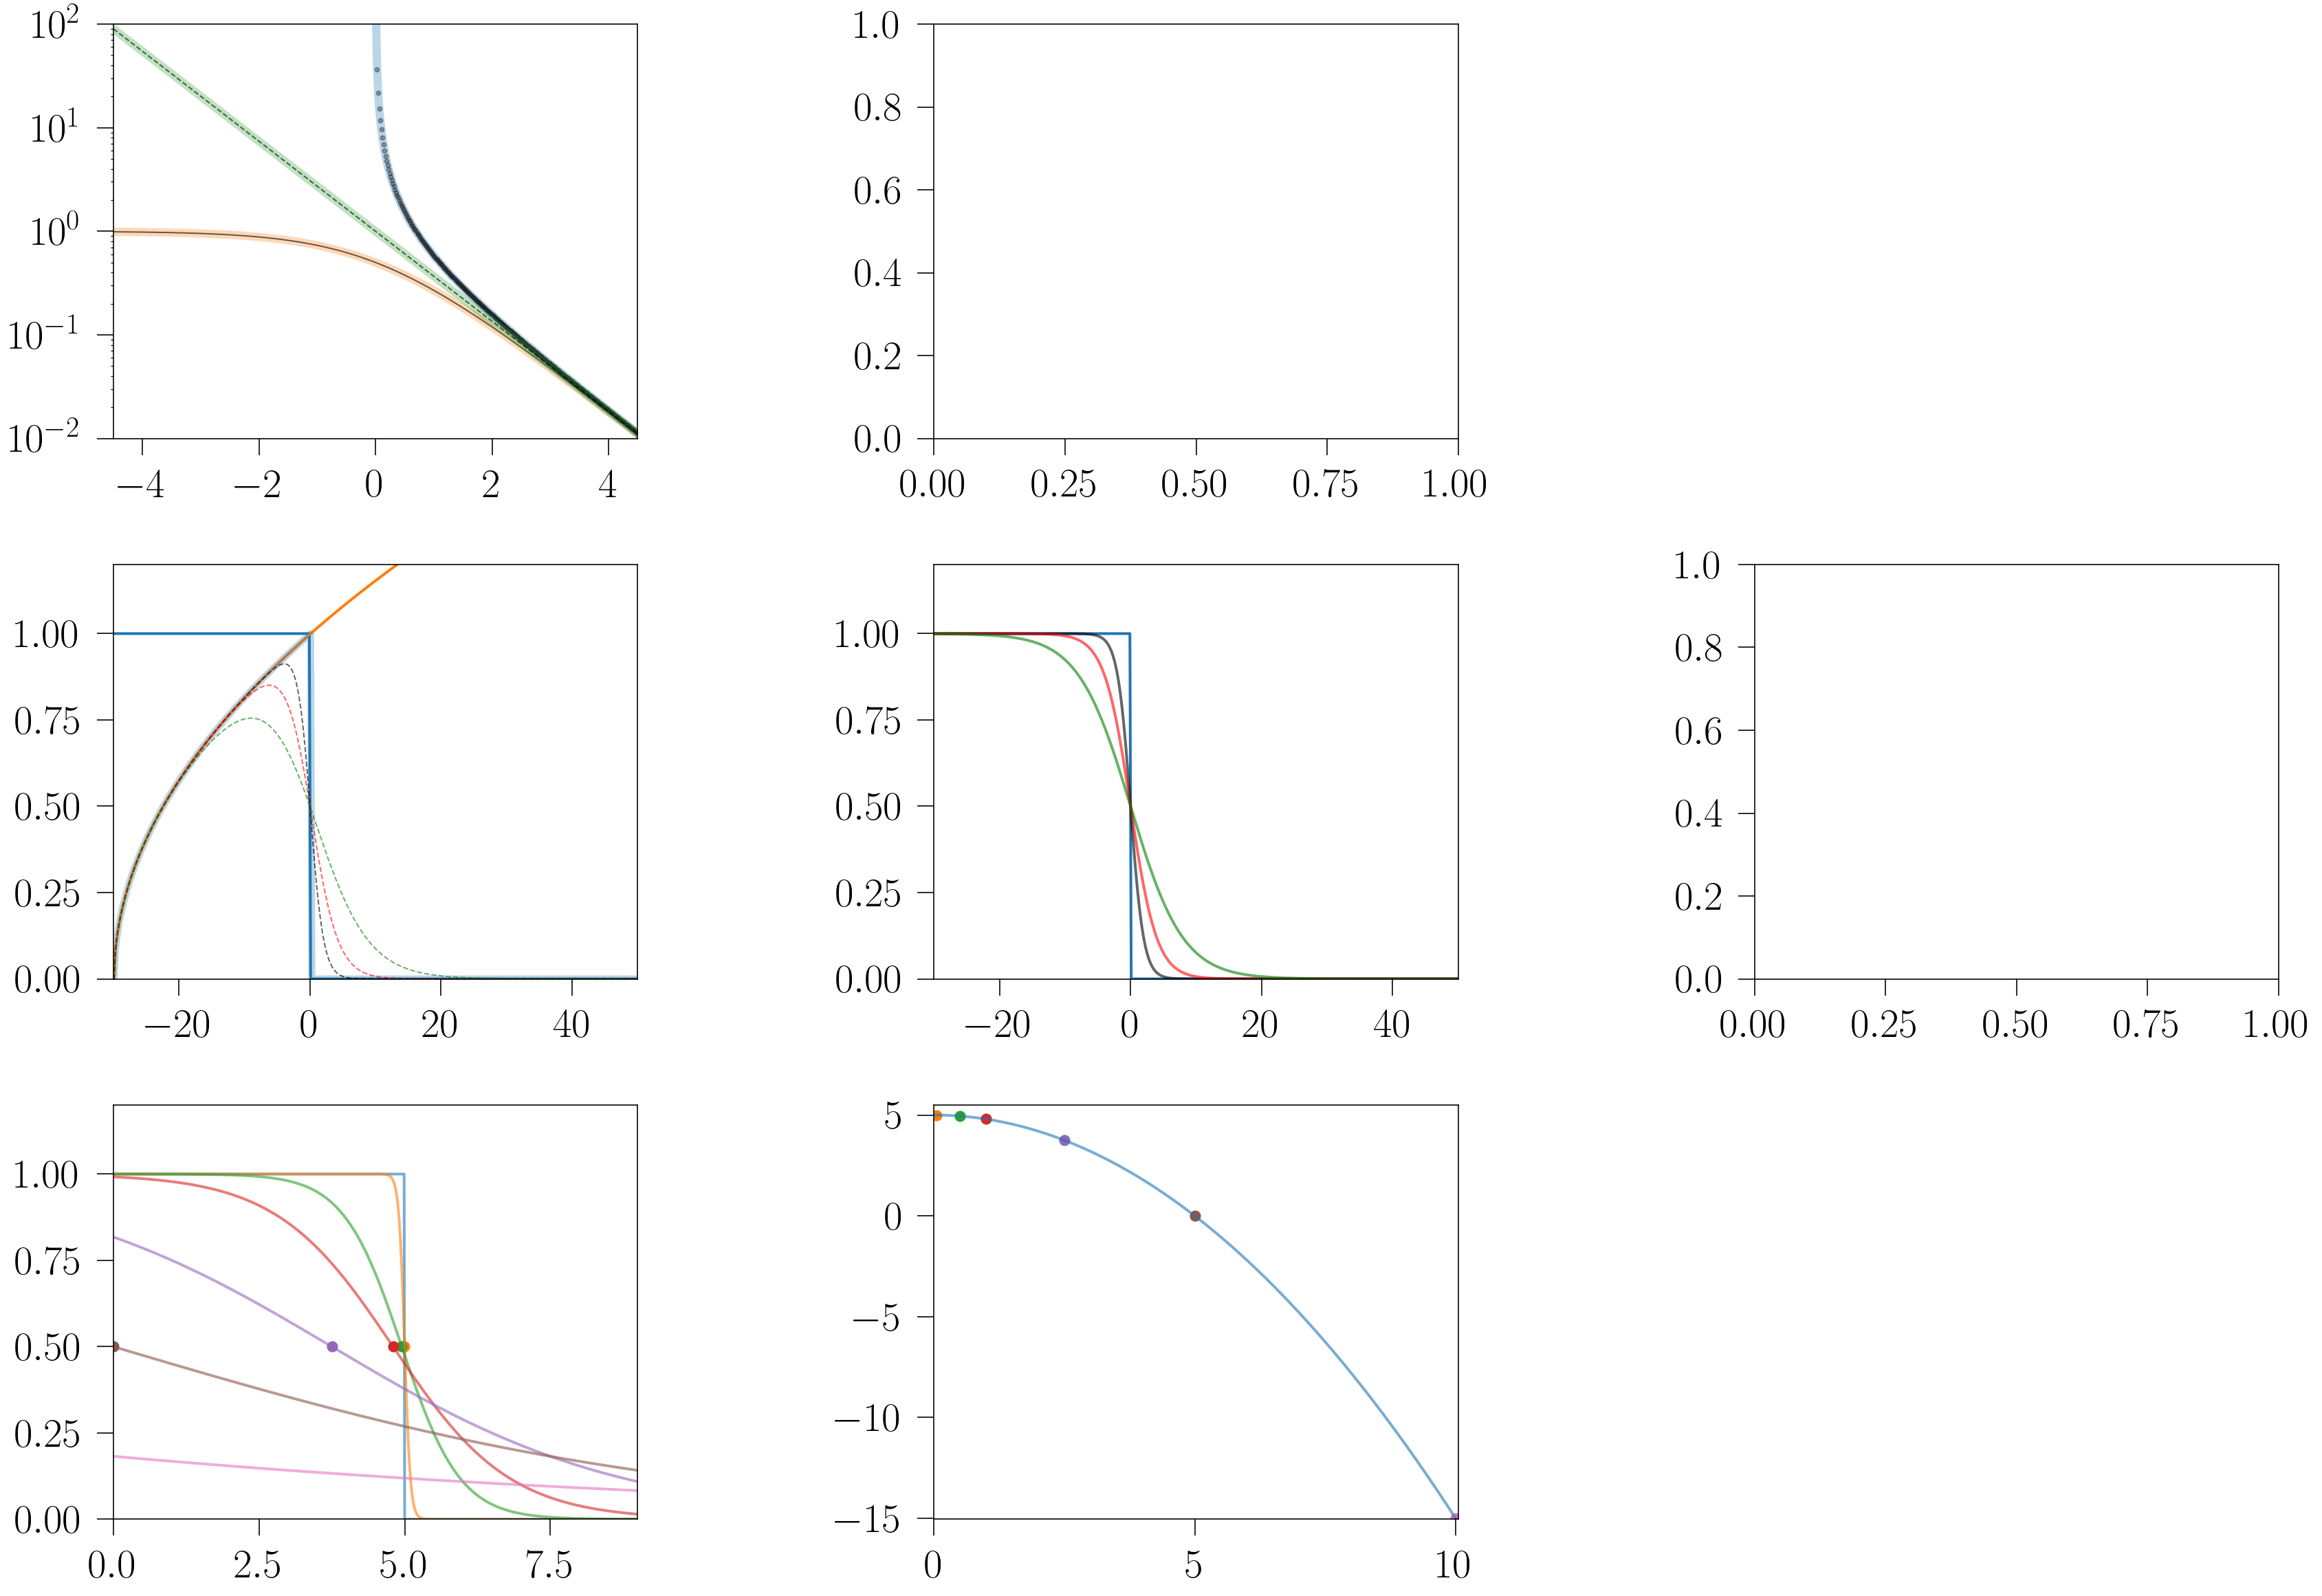

In [12]:
legends_fig_funtzioak = ['$N=20\\textrm{-level}$', '$N=\\textrm{ }3\\textrm{-level}$', '$2\\textrm{-level}$', '$\\textrm{Harmonic Oscillator}$',]

fig_funtzioak_save = 'fig_funtzioak' # name of the file storing the figure
title_fig_funtzioak   = '' # Title for the figure, if needed

x_axis_label_fig_funtzioak = '$x\\equiv\\frac{k_{B}T}{\\Delta}$'
y_axis_label_fig_funtzioak_U = '$\\frac{U}{Nk_{B}}$'
y_axis_label_fig_funtzioak_S = '$\\frac{S}{Nk_{B}}$'
y_axis_label_fig_funtzioak_C = '$\\frac{C}{Nk_{B}}$'


x_min_lim_fig_funtzioak, x_max_lim_fig_funtzioak = 0.00, 10.00# 390.0
y_min_lim_fig_funtzioak = 0.00
y_max_lim_fig_funtzioak = 10.00, 1.00# 8100.0# 

######################################################

fig_funtzioak = plt.figure(figsize=(30, 20),)# constrained_layout=True)#figsize=(24, 10) and ncols=7, nrows=1

spec_1 = gridspec.GridSpec(ncols=17, nrows=14, figure=fig_funtzioak)

fig_funtzioak_ax0 = fig_funtzioak.add_subplot(spec_1[0:4,0:4])
fig_funtzioak_ax1 = fig_funtzioak.add_subplot(spec_1[0:4,6:10])

fig_funtzioak_ax2 = fig_funtzioak.add_subplot(spec_1[5:9,0:4])
fig_funtzioak_ax3 = fig_funtzioak.add_subplot(spec_1[5:9,6:10])
fig_funtzioak_ax4 = fig_funtzioak.add_subplot(spec_1[5:9,12:16])

fig_funtzioak_ax5 = fig_funtzioak.add_subplot(spec_1[10:14,0:4])
fig_funtzioak_ax6 = fig_funtzioak.add_subplot(spec_1[10:14,6:10])


axes_fig_funtzioak = [fig_funtzioak_ax0,fig_funtzioak_ax1,fig_funtzioak_ax2,fig_funtzioak_ax3,fig_funtzioak_ax4,fig_funtzioak_ax5,fig_funtzioak_ax6]

#fig_funtzioak.text(0.400, 0.05, r'\textrm{%s}' % x_axis_label_fig_funtzioak, size=30, va='center')#, transform=ax0.transAxes);

#fig_funtzioak.text(0.040, 0.22, r'\textrm{%s}' % y_axis_label_fig_funtzioak_C, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
#fig_funtzioak.text(0.040, 0.50, r'\textrm{%s}' % y_axis_label_fig_funtzioak_S, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
#fig_funtzioak.text(0.040, 0.77, r'\textrm{%s}' % y_axis_label_fig_funtzioak_U, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');

#fig_funtzioak.text(0.47, 0.22, r'\textrm{%s}' % y_axis_label_fig_funtzioak_C, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
#fig_funtzioak.text(0.47, 0.50, r'\textrm{%s}' % y_axis_label_fig_funtzioak_S, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
#fig_funtzioak.text(0.47, 0.77, r'\textrm{%s}' % y_axis_label_fig_funtzioak_U, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
#
x0_ticks = [i for i in (np.linspace(0,100,6)-40.)/10]
axes_fig_funtzioak[0].set_xticks(x0_ticks)
for i in axes_fig_funtzioak:
    i.tick_params(axis='y', labelsize=30, pad=10, length=12)
    i.tick_params(axis='x', labelsize=30, pad=10, length=12, )
    #i.set_xticks(x_ticks)
    #i.set_xlim(x_min_lim_fig_funtzioak, x_max_lim_fig_funtzioak)
    

axes_fig_funtzioak[0].set_yscale('log')
axes_fig_funtzioak[0].set_ylim(10**-2.0,  10**2)
axes_fig_funtzioak[0].set_xlim(-4.5,  4.5)
axes_fig_funtzioak[2].set_ylim(0.00,  1.20)
axes_fig_funtzioak[2].set_xlim(-30.00,  50.00)
axes_fig_funtzioak[3].set_ylim(0.00,  1.20)
axes_fig_funtzioak[3].set_xlim(-30.00,  50.00)
axes_fig_funtzioak[5].set_ylim(0.00,  1.20)
axes_fig_funtzioak[5].set_xlim(0.00,  9.00)
axes_fig_funtzioak[6].set_ylim(-15.05, 5.5)
axes_fig_funtzioak[6].set_xlim(0.00,10.05)


warnings.filterwarnings('ignore')
labels_fig_funtzioak = [r'\textrm{%s}' % i for i in legends_fig_funtzioak]

filter = (E_mu_kBT>0.0001)
axes_fig_funtzioak[0].plot(E_mu_kBT, f_FD_values(E_mu_kBT), lw=6, color=colors_fig[1], label=labels_fig_funtzioak[0],alpha=0.3);
axes_fig_funtzioak[0].plot(E_mu_kBT, f_FD_values(E_mu_kBT), '-', lw=1, color='k', label=labels_fig_funtzioak[0],alpha=0.6);
axes_fig_funtzioak[0].plot(E_mu_kBT[filter], f_BE_values(E_mu_kBT[filter]), lw=6, color=colors_fig[0], label=labels_fig_funtzioak[1],alpha=0.3);
axes_fig_funtzioak[0].plot(E_mu_kBT[filter], f_BE_values(E_mu_kBT[filter]), '.', lw=1, color='k', label=labels_fig_funtzioak[1],alpha=0.3);
axes_fig_funtzioak[0].plot(E_mu_kBT, f_MX_values(E_mu_kBT), lw=6, color=colors_fig[2], label=labels_fig_funtzioak[2],alpha=0.3);
axes_fig_funtzioak[0].plot(E_mu_kBT, f_MX_values(E_mu_kBT), '--', lw=1, color='k', label=labels_fig_funtzioak[2],alpha=0.6);


axes_fig_funtzioak[2].plot(np.linspace(-50,30,401)+19.90, np.heaviside(np.linspace(-50,30,401)+19.90, 1) - np.sign(np.linspace(-50,30,401)+19.90), lw=2, color=colors_fig[0]);#, label=labels_fig_funtzioak[0]);
axes_fig_funtzioak[2].plot(np.linspace(0,80,401)-29.9, (1./sqrt(30.))*np.linspace(0,80,401)**0.5, lw=2, color=colors_fig[1]);#, label=labels_fig_funtzioak[0]);
axes_fig_funtzioak[2].plot(np.linspace(0,80,401)-29.9, (np.heaviside(np.linspace(-50,30,401)+19.90, 1) - np.sign(np.linspace(-50,30,401)+19.90))*(1./sqrt(30.))*np.linspace(0,80,401)**0.5, lw=5, color=colors_fig[0], alpha=0.3);#, label=labels_fig_funtzioak[0]);

axes_fig_funtzioak[2].plot(np.linspace(0,80,401)-29.9, f_FD_T0_values((np.linspace(0,80,401)-29.9)*1.00)*(1./sqrt(30.))*np.linspace(0,80,401)**0.5, '--', lw=1, color='k', label=labels_fig_funtzioak[2],alpha=0.6);
axes_fig_funtzioak[2].plot(np.linspace(0,80,401)-29.9, f_FD_T1_values((np.linspace(0,80,401)-29.9)*0.50)*(1./sqrt(30.))*np.linspace(0,80,401)**0.5, '--', lw=1, color='r', label=labels_fig_funtzioak[2],alpha=0.6);
axes_fig_funtzioak[2].plot(np.linspace(0,80,401)-29.9, f_FD_T2_values((np.linspace(0,80,401)-29.9)*0.25)*(1./sqrt(30.))*np.linspace(0,80,401)**0.5, '--', lw=1, color='g', label=labels_fig_funtzioak[2],alpha=0.6);

axes_fig_funtzioak[3].plot(np.linspace(-50,30,401)+19.90, np.heaviside(np.linspace(-50,30,401)+19.90, 1) - np.sign(np.linspace(-50,30,401)+19.90), lw=2, color=colors_fig[0]);#, label=labels_fig_funtzioak[0]);
axes_fig_funtzioak[3].plot(np.linspace(0,80,401)-29.9, f_FD_T0_values((np.linspace(0,80,401)-29.9)*1.00), '-', lw=2, color='k', label=labels_fig_funtzioak[2],alpha=0.6);
axes_fig_funtzioak[3].plot(np.linspace(0,80,401)-29.9, f_FD_T1_values((np.linspace(0,80,401)-29.9)*0.50), '-', lw=2, color='r', label=labels_fig_funtzioak[2],alpha=0.6);
axes_fig_funtzioak[3].plot(np.linspace(0,80,401)-29.9, f_FD_T2_values((np.linspace(0,80,401)-29.9)*0.25), '-', lw=2, color='g', label=labels_fig_funtzioak[2],alpha=0.6);

axes_fig_funtzioak[5].plot(epsilon, f_FD_kittel_values(epsilon,0.0000001,5.0), '-', lw=2, color=colors_fig[0], label=labels_fig_funtzioak[2],alpha=0.6);
axes_fig_funtzioak[5].plot(epsilon, f_FD_kittel_values(epsilon,temperatures[0],5.0), '-', lw=2, color=colors_fig[1], label=labels_fig_funtzioak[2],alpha=0.6);
axes_fig_funtzioak[5].plot(epsilon, f_FD_kittel_values(epsilon,temperatures[1],5.0), '-', lw=2, color=colors_fig[2], label=labels_fig_funtzioak[2],alpha=0.6);
axes_fig_funtzioak[5].plot(epsilon, f_FD_kittel_values(epsilon,temperatures[2],5.0), '-', lw=2, color=colors_fig[3], label=labels_fig_funtzioak[2],alpha=0.6);
axes_fig_funtzioak[5].plot(epsilon, f_FD_kittel_values(epsilon,temperatures[3],5.0), '-', lw=2, color=colors_fig[4], label=labels_fig_funtzioak[2],alpha=0.6);
axes_fig_funtzioak[5].plot(epsilon, f_FD_kittel_values(epsilon,temperatures[4],5.0), '-', lw=2, color=colors_fig[5], label=labels_fig_funtzioak[2],alpha=0.6);
axes_fig_funtzioak[5].plot(epsilon, f_FD_kittel_values(epsilon,temperatures[5],5.0), '-', lw=2, color=colors_fig[6], label=labels_fig_funtzioak[2],alpha=0.6);

axes_fig_funtzioak[5].scatter(muT_values(5.0,temperatures[0]),0.5, s=50, color=colors_fig[1], label=labels_fig_funtzioak[2],alpha=1.0);
axes_fig_funtzioak[5].scatter(muT_values(5.0,temperatures[1]),0.5, s=50, color=colors_fig[2], label=labels_fig_funtzioak[2],alpha=1.0);
axes_fig_funtzioak[5].scatter(muT_values(5.0,temperatures[2]),0.5, s=50, color=colors_fig[3], label=labels_fig_funtzioak[2],alpha=1.0);
axes_fig_funtzioak[5].scatter(muT_values(5.0,temperatures[3]),0.5, s=50, color=colors_fig[4], label=labels_fig_funtzioak[2],alpha=1.0);
axes_fig_funtzioak[5].scatter(muT_values(5.0,temperatures[4]),0.5, s=50, color=colors_fig[5], label=labels_fig_funtzioak[2],alpha=1.0);
axes_fig_funtzioak[5].scatter(muT_values(5.0,temperatures[5]),0.5, s=50, color=colors_fig[6], label=labels_fig_funtzioak[2],alpha=1.0);

axes_fig_funtzioak[6].plot(t_mu, muT_values(5.0,t_mu), '-', lw=2, color=colors_fig[0], label=labels_fig_funtzioak[2],alpha=0.6);
axes_fig_funtzioak[6].scatter(temperatures[0],muT_values(5.0,temperatures[0]), s=50, color=colors_fig[1], label=labels_fig_funtzioak[2],alpha=1.0);
axes_fig_funtzioak[6].scatter(temperatures[1],muT_values(5.0,temperatures[1]), s=50, color=colors_fig[2], label=labels_fig_funtzioak[2],alpha=1.0);
axes_fig_funtzioak[6].scatter(temperatures[2],muT_values(5.0,temperatures[2]), s=50, color=colors_fig[3], label=labels_fig_funtzioak[2],alpha=1.0);
axes_fig_funtzioak[6].scatter(temperatures[3],muT_values(5.0,temperatures[3]), s=50, color=colors_fig[4], label=labels_fig_funtzioak[2],alpha=1.0);
axes_fig_funtzioak[6].scatter(temperatures[4],muT_values(5.0,temperatures[4]), s=50, color=colors_fig[5], label=labels_fig_funtzioak[2],alpha=1.0);
axes_fig_funtzioak[6].scatter(temperatures[5],muT_values(5.0,temperatures[5]), s=50, color=colors_fig[6], label=labels_fig_funtzioak[2],alpha=1.0);


#axes_fig_funtzioak[2].plot(kBT_delta, S_2_level_values(kBT_delta), lw=4, color=colors_fig[2]);#, label=labels_fig_funtzioak[0]);
#axes_fig_funtzioak[3].plot(kBT_delta, S_harmonic_values(kBT_delta), lw=4, color=colors_fig[3]);#, label=labels_fig_funtzioak[0]);

#axes_fig_funtzioak[4].plot(kBT_delta, C_n_level_values(20,kBT_delta), lw=4, color=colors_fig[1]);#, label=labels_fig_funtzioak[0]);
#axes_fig_funtzioak[4].plot(kBT_delta, C_n_level_values(3,kBT_delta), lw=4, color=colors_fig[0]);#, label=labels_fig_funtzioak[0]);

#for i in range(4, 20,2):
#    axes_fig_funtzioak[4].plot(kBT_delta, C_n_level_values(i,kBT_delta), lw=1, alpha=0.3, color=colors_fig[6]);
#
#axes_fig_funtzioak[4].plot(kBT_delta, C_n_level_values(50,kBT_delta), '--', lw=1, color=colors_fig[6]);
#axes_fig_funtzioak[4].plot(kBT_delta, C_n_level_values(100,kBT_delta), '--', lw=1, color=colors_fig[6]);
#axes_fig_funtzioak[4].text(6.0, 1.1, r'$N=100$', size=20, color=colors_fig[6], va='center', rotation='horizontal', transform=axes_fig_funtzioak[4].transData);
#axes_fig_funtzioak[4].text(6.25, 0.85, r'$N=50$', size=20, color=colors_fig[6], va='center', rotation='horizontal', transform=axes_fig_funtzioak[4].transData);
#
#axes_fig_funtzioak[4].plot(kBT_delta, C_2_level_values(kBT_delta), lw=4, color=colors_fig[2]);#, label=labels_fig_funtzioak[0]);
#axes_fig_funtzioak[5].plot(kBT_delta, C_harmonic_values(kBT_delta), lw=4, color=colors_fig[3]);#, label=labels_fig_funtzioak[0]);


#axes_fig_funtzioak[2].hlines(np.log(20.), kBT_delta[0],kBT_delta[-1], colors='k', linestyles='dashed',);
    
#axes_fig_funtzioak[0].legend(bbox_transform=axes_fig_funtzioak[0].transAxes, bbox_to_anchor=(3.25, 0.98), ncol=1, borderaxespad=0, frameon=False, fontsize=25);
#axes_fig_funtzioak[1].legend(bbox_transform=axes_fig_funtzioak[1].transAxes, bbox_to_anchor=(1.13, 0.62), ncol=1, borderaxespad=0, frameon=False, fontsize=25);

plt.savefig('kkkkkk.pdf', format='pdf', dpi=180, bbox_inches="tight")


# $N$-level system

In [4]:
#n_level = 20.
Z_n_level = (1. - exp(-n/x))/(1. - exp(-1./x))

In [5]:
U_n_level = log(Z_n_level).diff(x) * x**2.0

U_n_level

x**2.0*(1.0 - exp(-1.0/x))*(-n*exp(-n/x)/(x**2*(1.0 - exp(-1.0/x))) + 1.0*(1.0 - exp(-n/x))*exp(-1.0/x)/(x**2*(1.0 - exp(-1.0/x))**2))/(1.0 - exp(-n/x))

In [6]:
S_n_level = (x * log(Z_n_level)).diff(x)

S_n_level

x*(1.0 - exp(-1.0/x))*(-n*exp(-n/x)/(x**2*(1.0 - exp(-1.0/x))) + 1.0*(1.0 - exp(-n/x))*exp(-1.0/x)/(x**2*(1.0 - exp(-1.0/x))**2))/(1.0 - exp(-n/x)) + log((1.0 - exp(-n/x))/(1.0 - exp(-1.0/x)))

In [7]:
C_n_level = x * (x*log(Z_n_level)).diff(x,2)

C_n_level

-(n**2*exp(-n/x)/x + n*(n*exp(-n/x) - (1.0 - 1.0*exp(-n/x))*exp(-1.0/x)/(1.0 - exp(-1.0/x)))*exp(-n/x)/(x*(1.0 - exp(-n/x))) + 2.0*n*exp(-1.0/x)*exp(-n/x)/(x*(1.0 - exp(-1.0/x))) - 2*(1.0 - 1.0*exp(-n/x))*exp(-1.0/x)/(1.0 - exp(-1.0/x)) + (2.0 - 2.0*exp(-n/x))*exp(-1.0/x)/(1.0 - exp(-1.0/x)) - (1.0 - 1.0*exp(-n/x))*exp(-1.0/x)/(x*(1.0 - exp(-1.0/x))) - (1.0*n*exp(-n/x) - 1.0*(1 - exp(-n/x))*exp(-1.0/x)/(1.0 - exp(-1.0/x)))*exp(-1.0/x)/(x*(1.0 - exp(-1.0/x))) - (2.0 - 2.0*exp(-n/x))*exp(-2.0/x)/(x*(1.0 - exp(-1.0/x))**2))/(x*(1.0 - exp(-n/x)))

In [8]:
U_n_level_values = lambdify([n, x], U_n_level, 'numpy')

S_n_level_values = lambdify([n, x], S_n_level, 'numpy')

C_n_level_values = lambdify([n, x], C_n_level, 'numpy')

<br>

<hr>

<br>


# $2$-level system

In [9]:
Z_2_level = exp(1./x) + exp(-1.0/x)

In [10]:
U_2_level = log(Z_2_level).diff(x) * x**2.0

S_2_level = (x * log(Z_2_level)).diff(x)

C_2_level = x * (x*log(Z_2_level)).diff(x,2)

In [12]:
U_2_level

x**2.0*(-1.0*exp(1.0/x)/x**2 + 1.0*exp(-1.0/x)/x**2)/(exp(1.0/x) + exp(-1.0/x))

In [11]:
S_2_level

x*(-1.0*exp(1.0/x)/x**2 + 1.0*exp(-1.0/x)/x**2)/(exp(1.0/x) + exp(-1.0/x)) + log(exp(1.0/x) + exp(-1.0/x))

In [13]:
C_2_level

(-1.0*(exp(1.0/x) - exp(-1.0/x))**2/(x*(exp(1.0/x) + exp(-1.0/x))) + 1.0*exp(1.0/x)/x + 1.0*exp(-1.0/x)/x)/(x*(exp(1.0/x) + exp(-1.0/x)))

In [14]:
U_2_level_values = lambdify(x, U_2_level, 'numpy')

S_2_level_values = lambdify(x, S_2_level, 'numpy')

C_2_level_values = lambdify(x, C_2_level, 'numpy')

<br>

<hr>

<br>

# Harmonic oscillator

In [15]:
Z_harmonic = exp(-0.5*(1./x)) / (1.0 - exp(-1.0/x))

In [16]:
U_harmonic = log(Z_harmonic).diff(x) * x**2.0

S_harmonic = (x * log(Z_harmonic)).diff(x)

C_harmonic = x * (x*log(Z_harmonic)).diff(x,2)

In [17]:
U_harmonic_values = lambdify(x, U_harmonic, 'numpy')

S_harmonic_values = lambdify(x, S_harmonic, 'numpy')

C_harmonic_values = lambdify(x, C_harmonic, 'numpy')

In [ ]:
legends_fig_ariketa = ['$N=20\\textrm{-level}$', '$N=\\textrm{ }3\\textrm{-level}$', '$2\\textrm{-level}$', '$\\textrm{Harmonic Oscillator}$',]

fig_ariketa_save = 'fig_ariketa' # name of the file storing the figure
title_fig_ariketa   = '' # Title for the figure, if needed

x_axis_label_fig_ariketa = '$x\\equiv\\frac{k_{B}T}{\\Delta}$'
y_axis_label_fig_ariketa_U = '$\\frac{U}{Nk_{B}}$'
y_axis_label_fig_ariketa_S = '$\\frac{S}{Nk_{B}}$'
y_axis_label_fig_ariketa_C = '$\\frac{C}{Nk_{B}}$'


x_min_lim_fig_ariketa, x_max_lim_fig_ariketa = 0.00, 10.00# 390.0
y_min_lim_fig_ariketa = 0.00
y_max_lim_fig_ariketa = 10.00, 1.00# 8100.0# 

######################################################


fig_ariketa = plt.figure(figsize=(20, 20),)# constrained_layout=True)#figsize=(24, 10) and ncols=7, nrows=1


spec_1 = gridspec.GridSpec(ncols=11, nrows=14, figure=fig_ariketa)

fig_ariketa_ax0 = fig_ariketa.add_subplot(spec_1[0:4,0:4])
fig_ariketa_ax1 = fig_ariketa.add_subplot(spec_1[0:4,6:10])

fig_ariketa_ax2 = fig_ariketa.add_subplot(spec_1[5:9,0:4])
fig_ariketa_ax3 = fig_ariketa.add_subplot(spec_1[5:9,6:10])

fig_ariketa_ax4 = fig_ariketa.add_subplot(spec_1[10:14,0:4])
fig_ariketa_ax5 = fig_ariketa.add_subplot(spec_1[10:14,6:10])


axes_fig_ariketa = [fig_ariketa_ax0,fig_ariketa_ax1,fig_ariketa_ax2,fig_ariketa_ax3,fig_ariketa_ax4,fig_ariketa_ax5]

fig_ariketa.text(0.400, 0.05, r'\textrm{%s}' % x_axis_label_fig_ariketa, size=30, va='center')#, transform=ax0.transAxes);

fig_ariketa.text(0.040, 0.22, r'\textrm{%s}' % y_axis_label_fig_ariketa_C, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_ariketa.text(0.040, 0.50, r'\textrm{%s}' % y_axis_label_fig_ariketa_S, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_ariketa.text(0.040, 0.77, r'\textrm{%s}' % y_axis_label_fig_ariketa_U, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');

fig_ariketa.text(0.47, 0.22, r'\textrm{%s}' % y_axis_label_fig_ariketa_C, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_ariketa.text(0.47, 0.50, r'\textrm{%s}' % y_axis_label_fig_ariketa_S, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_ariketa.text(0.47, 0.77, r'\textrm{%s}' % y_axis_label_fig_ariketa_U, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');

x_ticks = [float(i) for i in range(0,12,2) ]

for i in axes_fig_ariketa:
    i.tick_params(axis='y', labelsize=30, pad=10, length=12)
    i.tick_params(axis='x', labelsize=30, pad=10, length=12, )
    i.set_xticks(x_ticks)
    i.set_xlim(x_min_lim_fig_ariketa, x_max_lim_fig_ariketa)
    
axes_fig_ariketa[0].set_ylim(-1.0,  8.0)
axes_fig_ariketa[2].set_ylim(y_min_lim_fig_ariketa,  4.0)
axes_fig_ariketa[4].set_ylim(y_min_lim_fig_ariketa,  1.5)
axes_fig_ariketa[1].set_ylim(-1.0,  8.0)
axes_fig_ariketa[3].set_ylim(y_min_lim_fig_ariketa,  4.0)
axes_fig_ariketa[5].set_ylim(y_min_lim_fig_ariketa,  1.5)


warnings.filterwarnings('ignore')
labels_fig_ariketa = [r'\textrm{%s}' % i for i in legends_fig_ariketa]

axes_fig_ariketa[0].plot(kBT_delta, U_n_level_values(20,kBT_delta), lw=4, color=colors_fig[1], label=labels_fig_ariketa[0]);
axes_fig_ariketa[0].plot(kBT_delta, U_n_level_values(3,kBT_delta), lw=4, color=colors_fig[0], label=labels_fig_ariketa[1]);
axes_fig_ariketa[0].plot(kBT_delta, U_2_level_values(kBT_delta), lw=4, color=colors_fig[2], label=labels_fig_ariketa[2]);
axes_fig_ariketa[0].plot(kBT_delta, U_2_level_values(kBT_delta)+1.0, '--', lw=2 ,color=colors_fig[2], alpha=0.5);#, label=labels_fig_ariketa[0]);
axes_fig_ariketa[1].plot(kBT_delta, U_harmonic_values(kBT_delta), lw=4, color=colors_fig[3], label=labels_fig_ariketa[3]);

axes_fig_ariketa[2].plot(kBT_delta, S_n_level_values(20,kBT_delta), lw=4, color=colors_fig[1]);#, label=labels_fig_ariketa[0]);
axes_fig_ariketa[2].plot(kBT_delta, S_n_level_values(3,kBT_delta), lw=4, color=colors_fig[0]);#, label=labels_fig_ariketa[0]);
axes_fig_ariketa[2].plot(kBT_delta, S_2_level_values(kBT_delta), lw=4, color=colors_fig[2]);#, label=labels_fig_ariketa[0]);
axes_fig_ariketa[3].plot(kBT_delta, S_harmonic_values(kBT_delta), lw=4, color=colors_fig[3]);#, label=labels_fig_ariketa[0]);

axes_fig_ariketa[4].plot(kBT_delta, C_n_level_values(20,kBT_delta), lw=4, color=colors_fig[1]);#, label=labels_fig_ariketa[0]);
axes_fig_ariketa[4].plot(kBT_delta, C_n_level_values(3,kBT_delta), lw=4, color=colors_fig[0]);#, label=labels_fig_ariketa[0]);

for i in range(4, 20,2):
    axes_fig_ariketa[4].plot(kBT_delta, C_n_level_values(i,kBT_delta), lw=1, alpha=0.3, color=colors_fig[6]);

axes_fig_ariketa[4].plot(kBT_delta, C_n_level_values(50,kBT_delta), '--', lw=1, color=colors_fig[6]);
axes_fig_ariketa[4].plot(kBT_delta, C_n_level_values(100,kBT_delta), '--', lw=1, color=colors_fig[6]);
axes_fig_ariketa[4].text(6.0, 1.1, r'$N=100$', size=20, color=colors_fig[6], va='center', rotation='horizontal', transform=axes_fig_ariketa[4].transData);
axes_fig_ariketa[4].text(6.25, 0.85, r'$N=50$', size=20, color=colors_fig[6], va='center', rotation='horizontal', transform=axes_fig_ariketa[4].transData);

axes_fig_ariketa[4].plot(kBT_delta, C_2_level_values(kBT_delta), lw=4, color=colors_fig[2]);#, label=labels_fig_ariketa[0]);
axes_fig_ariketa[5].plot(kBT_delta, C_harmonic_values(kBT_delta), lw=4, color=colors_fig[3]);#, label=labels_fig_ariketa[0]);


axes_fig_ariketa[2].hlines(np.log(20.), kBT_delta[0],kBT_delta[-1], colors='k', linestyles='dashed',);
    
axes_fig_ariketa[0].legend(bbox_transform=axes_fig_ariketa[0].transAxes, 
               bbox_to_anchor=(3.25, 0.98), 
               ncol=1, borderaxespad=0, frameon=False, fontsize=25);
axes_fig_ariketa[1].legend(bbox_transform=axes_fig_ariketa[1].transAxes, 
               bbox_to_anchor=(1.13, 0.62), 
               ncol=1, borderaxespad=0, frameon=False, fontsize=25);

#plt.savefig('kkkkkk.pdf', format='pdf', dpi=180, bbox_inches="tight")



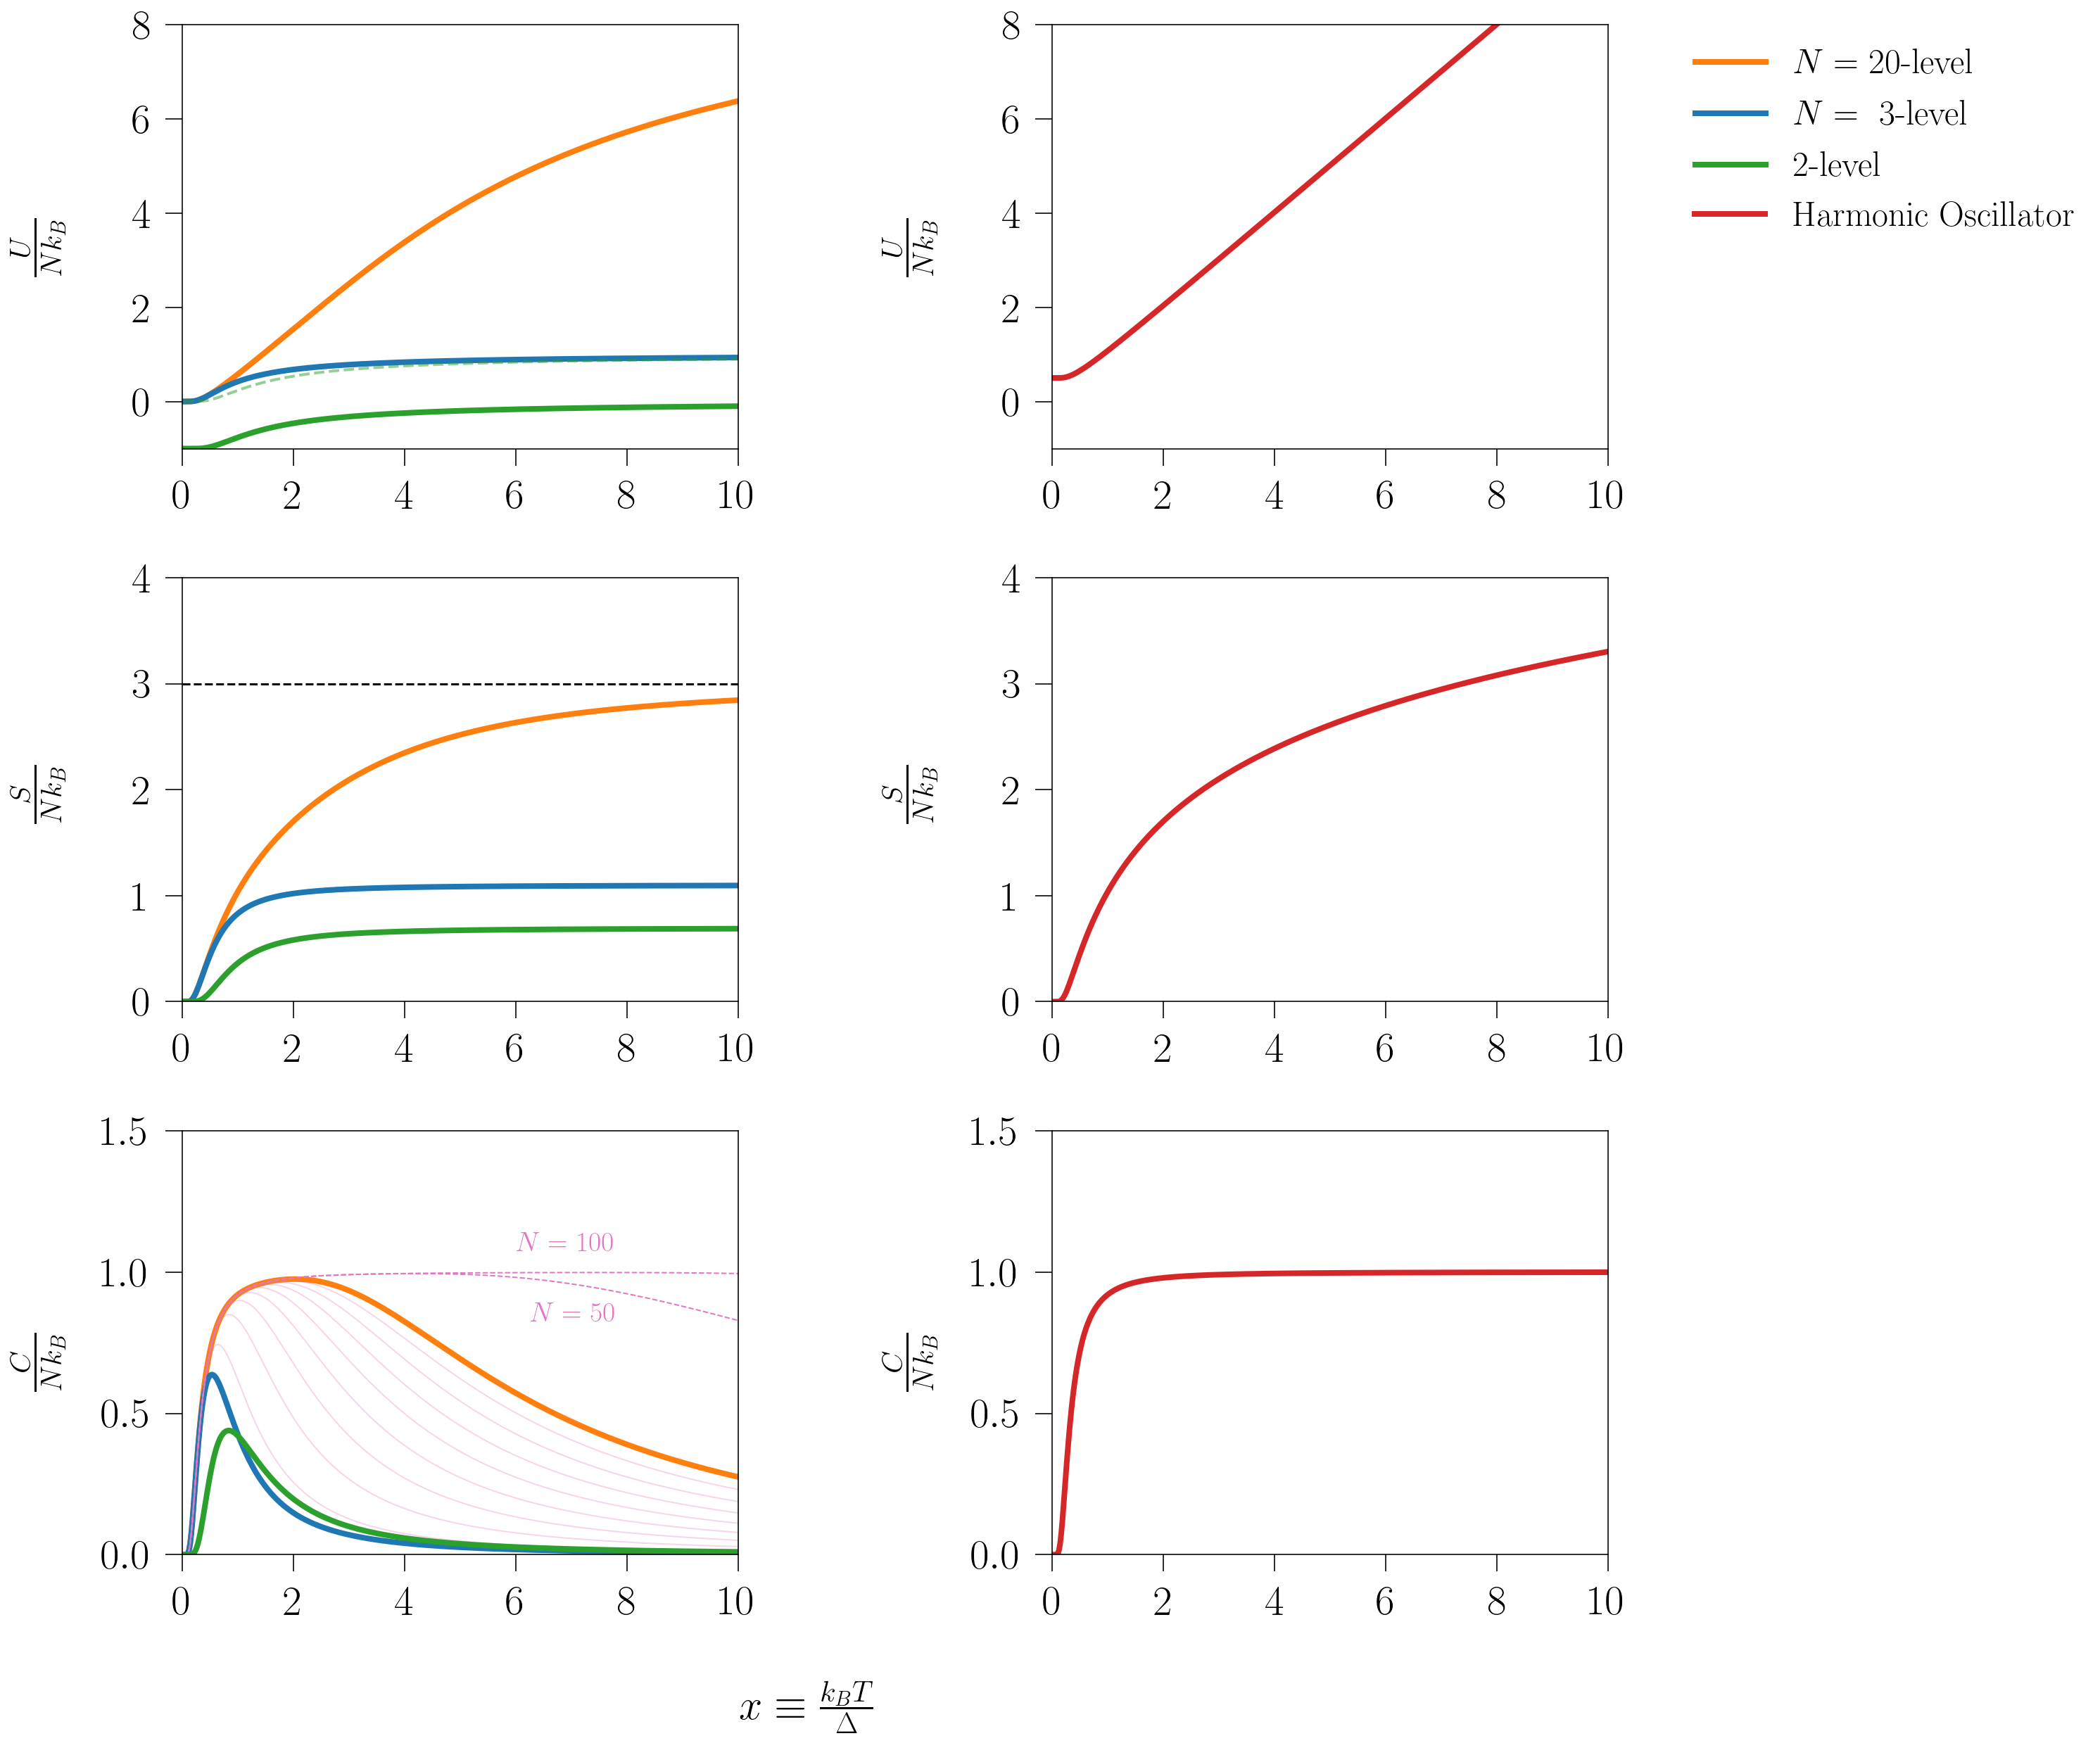

In [18]:
legends_fig_ariketa = ['$N=20\\textrm{-level}$', '$N=\\textrm{ }3\\textrm{-level}$', '$2\\textrm{-level}$', '$\\textrm{Harmonic Oscillator}$',]

fig_ariketa_save = 'fig_ariketa' # name of the file storing the figure
title_fig_ariketa   = '' # Title for the figure, if needed

x_axis_label_fig_ariketa = '$x\\equiv\\frac{k_{B}T}{\\Delta}$'
y_axis_label_fig_ariketa_U = '$\\frac{U}{Nk_{B}}$'
y_axis_label_fig_ariketa_S = '$\\frac{S}{Nk_{B}}$'
y_axis_label_fig_ariketa_C = '$\\frac{C}{Nk_{B}}$'


x_min_lim_fig_ariketa, x_max_lim_fig_ariketa = 0.00, 10.00# 390.0
y_min_lim_fig_ariketa = 0.00
y_max_lim_fig_ariketa = 10.00, 1.00# 8100.0# 

######################################################


fig_ariketa = plt.figure(figsize=(20, 20),)# constrained_layout=True)#figsize=(24, 10) and ncols=7, nrows=1


spec_1 = gridspec.GridSpec(ncols=11, nrows=14, figure=fig_ariketa)

fig_ariketa_ax0 = fig_ariketa.add_subplot(spec_1[0:4,0:4])
fig_ariketa_ax1 = fig_ariketa.add_subplot(spec_1[0:4,6:10])

fig_ariketa_ax2 = fig_ariketa.add_subplot(spec_1[5:9,0:4])
fig_ariketa_ax3 = fig_ariketa.add_subplot(spec_1[5:9,6:10])

fig_ariketa_ax4 = fig_ariketa.add_subplot(spec_1[10:14,0:4])
fig_ariketa_ax5 = fig_ariketa.add_subplot(spec_1[10:14,6:10])


axes_fig_ariketa = [fig_ariketa_ax0,fig_ariketa_ax1,fig_ariketa_ax2,fig_ariketa_ax3,fig_ariketa_ax4,fig_ariketa_ax5]

fig_ariketa.text(0.400, 0.05, r'\textrm{%s}' % x_axis_label_fig_ariketa, size=30, va='center')#, transform=ax0.transAxes);

fig_ariketa.text(0.040, 0.22, r'\textrm{%s}' % y_axis_label_fig_ariketa_C, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_ariketa.text(0.040, 0.50, r'\textrm{%s}' % y_axis_label_fig_ariketa_S, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_ariketa.text(0.040, 0.77, r'\textrm{%s}' % y_axis_label_fig_ariketa_U, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');

fig_ariketa.text(0.47, 0.22, r'\textrm{%s}' % y_axis_label_fig_ariketa_C, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_ariketa.text(0.47, 0.50, r'\textrm{%s}' % y_axis_label_fig_ariketa_S, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_ariketa.text(0.47, 0.77, r'\textrm{%s}' % y_axis_label_fig_ariketa_U, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');

x_ticks = [float(i) for i in range(0,12,2) ]

for i in axes_fig_ariketa:
    i.tick_params(axis='y', labelsize=30, pad=10, length=12)
    i.tick_params(axis='x', labelsize=30, pad=10, length=12, )
    i.set_xticks(x_ticks)
    i.set_xlim(x_min_lim_fig_ariketa, x_max_lim_fig_ariketa)
    
axes_fig_ariketa[0].set_ylim(-1.0,  8.0)
axes_fig_ariketa[2].set_ylim(y_min_lim_fig_ariketa,  4.0)
axes_fig_ariketa[4].set_ylim(y_min_lim_fig_ariketa,  1.5)
axes_fig_ariketa[1].set_ylim(-1.0,  8.0)
axes_fig_ariketa[3].set_ylim(y_min_lim_fig_ariketa,  4.0)
axes_fig_ariketa[5].set_ylim(y_min_lim_fig_ariketa,  1.5)


warnings.filterwarnings('ignore')
labels_fig_ariketa = [r'\textrm{%s}' % i for i in legends_fig_ariketa]

axes_fig_ariketa[0].plot(kBT_delta, U_n_level_values(20,kBT_delta), lw=4, color=colors_fig[1], label=labels_fig_ariketa[0]);
axes_fig_ariketa[0].plot(kBT_delta, U_n_level_values(3,kBT_delta), lw=4, color=colors_fig[0], label=labels_fig_ariketa[1]);
axes_fig_ariketa[0].plot(kBT_delta, U_2_level_values(kBT_delta), lw=4, color=colors_fig[2], label=labels_fig_ariketa[2]);
axes_fig_ariketa[0].plot(kBT_delta, U_2_level_values(kBT_delta)+1.0, '--', lw=2 ,color=colors_fig[2], alpha=0.5);#, label=labels_fig_ariketa[0]);
axes_fig_ariketa[1].plot(kBT_delta, U_harmonic_values(kBT_delta), lw=4, color=colors_fig[3], label=labels_fig_ariketa[3]);

axes_fig_ariketa[2].plot(kBT_delta, S_n_level_values(20,kBT_delta), lw=4, color=colors_fig[1]);#, label=labels_fig_ariketa[0]);
axes_fig_ariketa[2].plot(kBT_delta, S_n_level_values(3,kBT_delta), lw=4, color=colors_fig[0]);#, label=labels_fig_ariketa[0]);
axes_fig_ariketa[2].plot(kBT_delta, S_2_level_values(kBT_delta), lw=4, color=colors_fig[2]);#, label=labels_fig_ariketa[0]);
axes_fig_ariketa[3].plot(kBT_delta, S_harmonic_values(kBT_delta), lw=4, color=colors_fig[3]);#, label=labels_fig_ariketa[0]);

axes_fig_ariketa[4].plot(kBT_delta, C_n_level_values(20,kBT_delta), lw=4, color=colors_fig[1]);#, label=labels_fig_ariketa[0]);
axes_fig_ariketa[4].plot(kBT_delta, C_n_level_values(3,kBT_delta), lw=4, color=colors_fig[0]);#, label=labels_fig_ariketa[0]);

for i in range(4, 20,2):
    axes_fig_ariketa[4].plot(kBT_delta, C_n_level_values(i,kBT_delta), lw=1, alpha=0.3, color=colors_fig[6]);

axes_fig_ariketa[4].plot(kBT_delta, C_n_level_values(50,kBT_delta), '--', lw=1, color=colors_fig[6]);
axes_fig_ariketa[4].plot(kBT_delta, C_n_level_values(100,kBT_delta), '--', lw=1, color=colors_fig[6]);
axes_fig_ariketa[4].text(6.0, 1.1, r'$N=100$', size=20, color=colors_fig[6], va='center', rotation='horizontal', transform=axes_fig_ariketa[4].transData);
axes_fig_ariketa[4].text(6.25, 0.85, r'$N=50$', size=20, color=colors_fig[6], va='center', rotation='horizontal', transform=axes_fig_ariketa[4].transData);

axes_fig_ariketa[4].plot(kBT_delta, C_2_level_values(kBT_delta), lw=4, color=colors_fig[2]);#, label=labels_fig_ariketa[0]);
axes_fig_ariketa[5].plot(kBT_delta, C_harmonic_values(kBT_delta), lw=4, color=colors_fig[3]);#, label=labels_fig_ariketa[0]);


axes_fig_ariketa[2].hlines(np.log(20.), kBT_delta[0],kBT_delta[-1], colors='k', linestyles='dashed',);
    
axes_fig_ariketa[0].legend(bbox_transform=axes_fig_ariketa[0].transAxes, 
               bbox_to_anchor=(3.25, 0.98), 
               ncol=1, borderaxespad=0, frameon=False, fontsize=25);
axes_fig_ariketa[1].legend(bbox_transform=axes_fig_ariketa[1].transAxes, 
               bbox_to_anchor=(1.13, 0.62), 
               ncol=1, borderaxespad=0, frameon=False, fontsize=25);

#plt.savefig('kkkkkk.pdf', format='pdf', dpi=180, bbox_inches="tight")




In [19]:
eshift,deg0,deg1 = symbols("eshift,deg0,deg1")

In [20]:
Z_2_deg = deg0*exp((1.0-eshift)/x) + deg1*exp((-1.0-eshift)/x)



In [21]:
U_2_deg = log(Z_2_deg).diff(x) * x**2.0

S_2_deg = (x * log(Z_2_deg)).diff(x)

C_2_deg = x * (x*log(Z_2_deg)).diff(x,2)

In [22]:
U_2_deg_values = lambdify([eshift, deg0, deg1, x], U_2_deg, 'numpy')

S_2_deg_values = lambdify([eshift, deg0, deg1, x], S_2_deg, 'numpy')

C_2_deg_values = lambdify([eshift, deg0, deg1, x], C_2_deg, 'numpy')

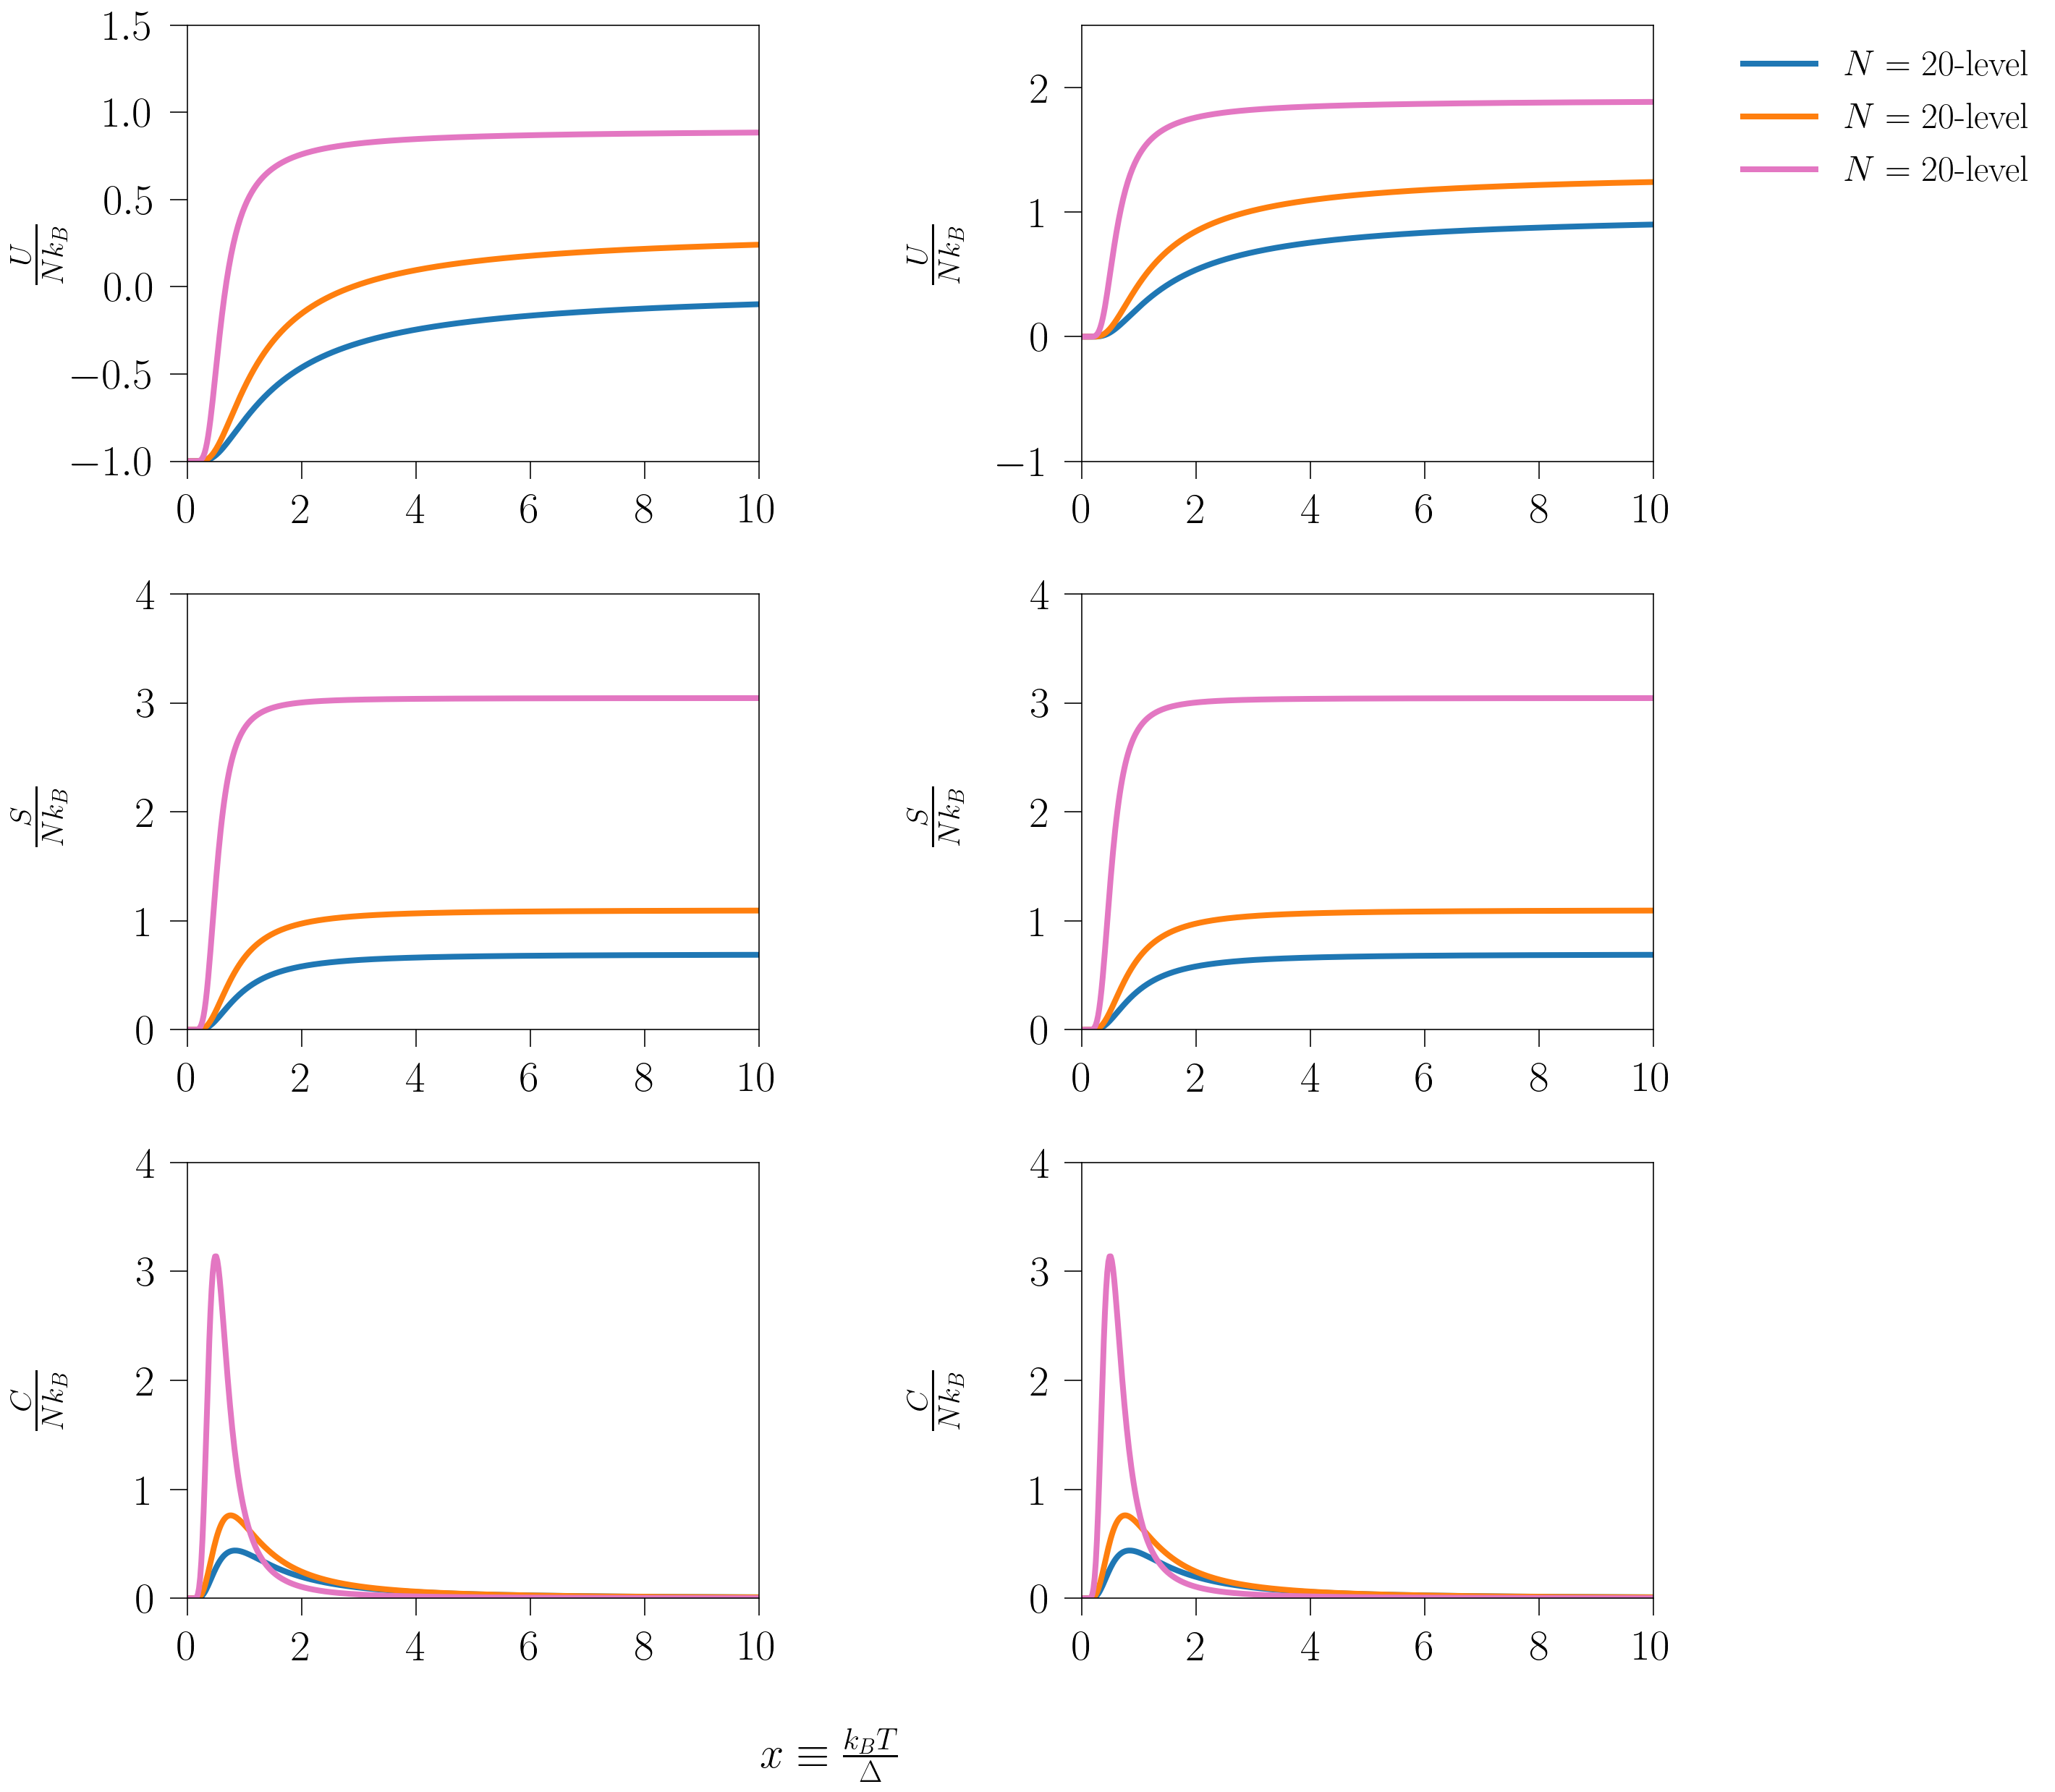

In [23]:
legends_fig_2_level = ['$N=20\\textrm{-level}$', '$N=\\textrm{ }3\\textrm{-level}$', '$2\\textrm{-level}$', '$\\textrm{Harmonic Oscillator}$',]

fig_2_level_save = 'fig_2_level' # name of the file storing the figure
title_fig_2_level   = '' # Title for the figure, if needed

x_axis_label_fig_2_level = '$x\\equiv\\frac{k_{B}T}{\\Delta}$'
y_axis_label_fig_2_level_U = '$\\frac{U}{Nk_{B}}$'
y_axis_label_fig_2_level_S = '$\\frac{S}{Nk_{B}}$'
y_axis_label_fig_2_level_C = '$\\frac{C}{Nk_{B}}$'


x_min_lim_fig_2_level, x_max_lim_fig_2_level = 0.00, 10.00# 390.0
y_min_lim_fig_2_level = 0.00
y_max_lim_fig_2_level = 10.00, 1.00# 8100.0# 

######################################################


fig_2_level = plt.figure(figsize=(20, 20),)# constrained_layout=True)#figsize=(24, 10) and ncols=7, nrows=1


spec_1 = gridspec.GridSpec(ncols=11, nrows=14, figure=fig_2_level)

fig_2_level_ax0 = fig_2_level.add_subplot(spec_1[0:4,0:4])
fig_2_level_ax1 = fig_2_level.add_subplot(spec_1[0:4,6:10])

fig_2_level_ax2 = fig_2_level.add_subplot(spec_1[5:9,0:4])
fig_2_level_ax3 = fig_2_level.add_subplot(spec_1[5:9,6:10])

fig_2_level_ax4 = fig_2_level.add_subplot(spec_1[10:14,0:4])
fig_2_level_ax5 = fig_2_level.add_subplot(spec_1[10:14,6:10])


axes_fig_2_level = [fig_2_level_ax0,fig_2_level_ax1,fig_2_level_ax2,fig_2_level_ax3,fig_2_level_ax4,fig_2_level_ax5]

fig_2_level.text(0.400, 0.05, r'\textrm{%s}' % x_axis_label_fig_2_level, size=30, va='center')#, transform=ax0.transAxes);

fig_2_level.text(0.040, 0.22, r'\textrm{%s}' % y_axis_label_fig_2_level_C, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_2_level.text(0.040, 0.50, r'\textrm{%s}' % y_axis_label_fig_2_level_S, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_2_level.text(0.040, 0.77, r'\textrm{%s}' % y_axis_label_fig_2_level_U, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');

fig_2_level.text(0.47, 0.22, r'\textrm{%s}' % y_axis_label_fig_2_level_C, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_2_level.text(0.47, 0.50, r'\textrm{%s}' % y_axis_label_fig_2_level_S, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_2_level.text(0.47, 0.77, r'\textrm{%s}' % y_axis_label_fig_2_level_U, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');

x_ticks = [float(i) for i in range(0,12,2) ]

for i in axes_fig_2_level:
    i.tick_params(axis='y', labelsize=30, pad=10, length=12)
    i.tick_params(axis='x', labelsize=30, pad=10, length=12, )
    i.set_xticks(x_ticks)
    i.set_xlim(x_min_lim_fig_2_level, x_max_lim_fig_2_level)
    
axes_fig_2_level[0].set_ylim(-1.0,  1.5)
axes_fig_2_level[2].set_ylim(y_min_lim_fig_2_level,  4.0)
axes_fig_2_level[4].set_ylim(y_min_lim_fig_2_level,  4.0)
axes_fig_2_level[1].set_ylim(-1.0,  2.5)
axes_fig_2_level[3].set_ylim(y_min_lim_fig_2_level,  4.0)
axes_fig_2_level[5].set_ylim(y_min_lim_fig_2_level,  4.0)


warnings.filterwarnings('ignore')
labels_fig_2_level = [r'\textrm{%s}' % i for i in legends_fig_2_level]

axes_fig_2_level[0].plot(kBT_delta, U_2_deg_values(0.0,1.0,1.0,kBT_delta), lw=4, color=colors_fig[0], label=labels_fig_2_level[0]);
axes_fig_2_level[0].plot(kBT_delta, U_2_deg_values(0.0,1.0,2.0,kBT_delta), lw=4, color=colors_fig[1], label=labels_fig_2_level[0]);
axes_fig_2_level[0].plot(kBT_delta, U_2_deg_values(0.0,1.0,20.0,kBT_delta), lw=4, color=colors_fig[6], label=labels_fig_2_level[0]);
axes_fig_2_level[1].plot(kBT_delta, U_2_deg_values(1.0,1.0,1.0,kBT_delta), lw=4, color=colors_fig[0], label=labels_fig_2_level[0]);
axes_fig_2_level[1].plot(kBT_delta, U_2_deg_values(1.0,1.0,2.0,kBT_delta), lw=4, color=colors_fig[1], label=labels_fig_2_level[0]);
axes_fig_2_level[1].plot(kBT_delta, U_2_deg_values(1.0,1.0,20.0,kBT_delta), lw=4, color=colors_fig[6], label=labels_fig_2_level[0]);

axes_fig_2_level[2].plot(kBT_delta, S_2_deg_values(0.0,1.0,1.0,kBT_delta), lw=4, color=colors_fig[0]);#, label=labels_fig_2_level[0]);
axes_fig_2_level[2].plot(kBT_delta, S_2_deg_values(0.0,1.0,2.0,kBT_delta), lw=4, color=colors_fig[1]);#, label=labels_fig_2_level[0]);
axes_fig_2_level[2].plot(kBT_delta, S_2_deg_values(0.0,1.0,20.0,kBT_delta), lw=4, color=colors_fig[6]);#, label=labels_fig_2_level[0]);
axes_fig_2_level[3].plot(kBT_delta, S_2_deg_values(1.0,1.0,1.0,kBT_delta), lw=4, color=colors_fig[0]);#, label=labels_fig_2_level[0]);
axes_fig_2_level[3].plot(kBT_delta, S_2_deg_values(1.0,1.0,2.0,kBT_delta), lw=4, color=colors_fig[1]);#, label=labels_fig_2_level[0]);
axes_fig_2_level[3].plot(kBT_delta, S_2_deg_values(1.0,1.0,20.0,kBT_delta), lw=4, color=colors_fig[6]);#, label=labels_fig_2_level[0]);

axes_fig_2_level[4].plot(kBT_delta, C_2_deg_values(0.0,1.0,1.0,kBT_delta), lw=4, color=colors_fig[0]);#, label=labels_fig_2_level[0]);
axes_fig_2_level[4].plot(kBT_delta, C_2_deg_values(0.0,1.0,2.0,kBT_delta), lw=4, color=colors_fig[1]);#, label=labels_fig_2_level[0]);
axes_fig_2_level[4].plot(kBT_delta, C_2_deg_values(0.0,1.0,20.0,kBT_delta), lw=4, color=colors_fig[6]);#, label=labels_fig_2_level[0]);
axes_fig_2_level[5].plot(kBT_delta, C_2_deg_values(1.0,1.0,1.0,kBT_delta), lw=4, color=colors_fig[0]);#, label=labels_fig_2_level[0]);
axes_fig_2_level[5].plot(kBT_delta, C_2_deg_values(1.0,1.0,2.0,kBT_delta), lw=4, color=colors_fig[1]);#, label=labels_fig_2_level[0]);
axes_fig_2_level[5].plot(kBT_delta, C_2_deg_values(1.0,1.0,20.0,kBT_delta), lw=4, color=colors_fig[6]);#, label=labels_fig_2_level[0]);


#axes_fig_2_level[2].hlines(np.log(20.), kBT_delta[0],kBT_delta[-1], colors='k', linestyles='dashed',);
    
axes_fig_2_level[0].legend(bbox_transform=axes_fig_2_level[0].transAxes, 
               bbox_to_anchor=(3.25, 0.98), 
               ncol=1, borderaxespad=0, frameon=False, fontsize=25);
#axes_fig_2_level[1].legend(bbox_transform=axes_fig_2_level[1].transAxes, 
#               bbox_to_anchor=(1.13, 0.62), 
#               ncol=1, borderaxespad=0, frameon=False, fontsize=25);

#plt.savefig('2kkkkkk.pdf', format='pdf', dpi=180, bbox_inches="tight")



In [24]:
y = symbols("y")

In [25]:
Z_1_mag = 1 + exp(-1.0/x)*(exp(1.0/y) + exp(-1.0/y))

In [26]:
U_1_mag = log(Z_1_mag).diff(x) * x**2.0

S_1_mag = (x * log(Z_1_mag)).diff(x)

C_1_mag = x * (x*log(Z_1_mag)).diff(x,2)

M_1_mag = (-y**2.0)*log(Z_1_mag).diff(y)



In [27]:
kBT_delta = np.linspace(1,100000000,500)/10000000.0

In [28]:
U_1_mag_values = lambdify([x, y], U_1_mag, 'numpy')

S_1_mag_values = lambdify([x, y], S_1_mag, 'numpy')

C_1_mag_values = lambdify([x, y], C_1_mag, 'numpy')

M_1_mag_values = lambdify([x, y], M_1_mag, 'numpy')

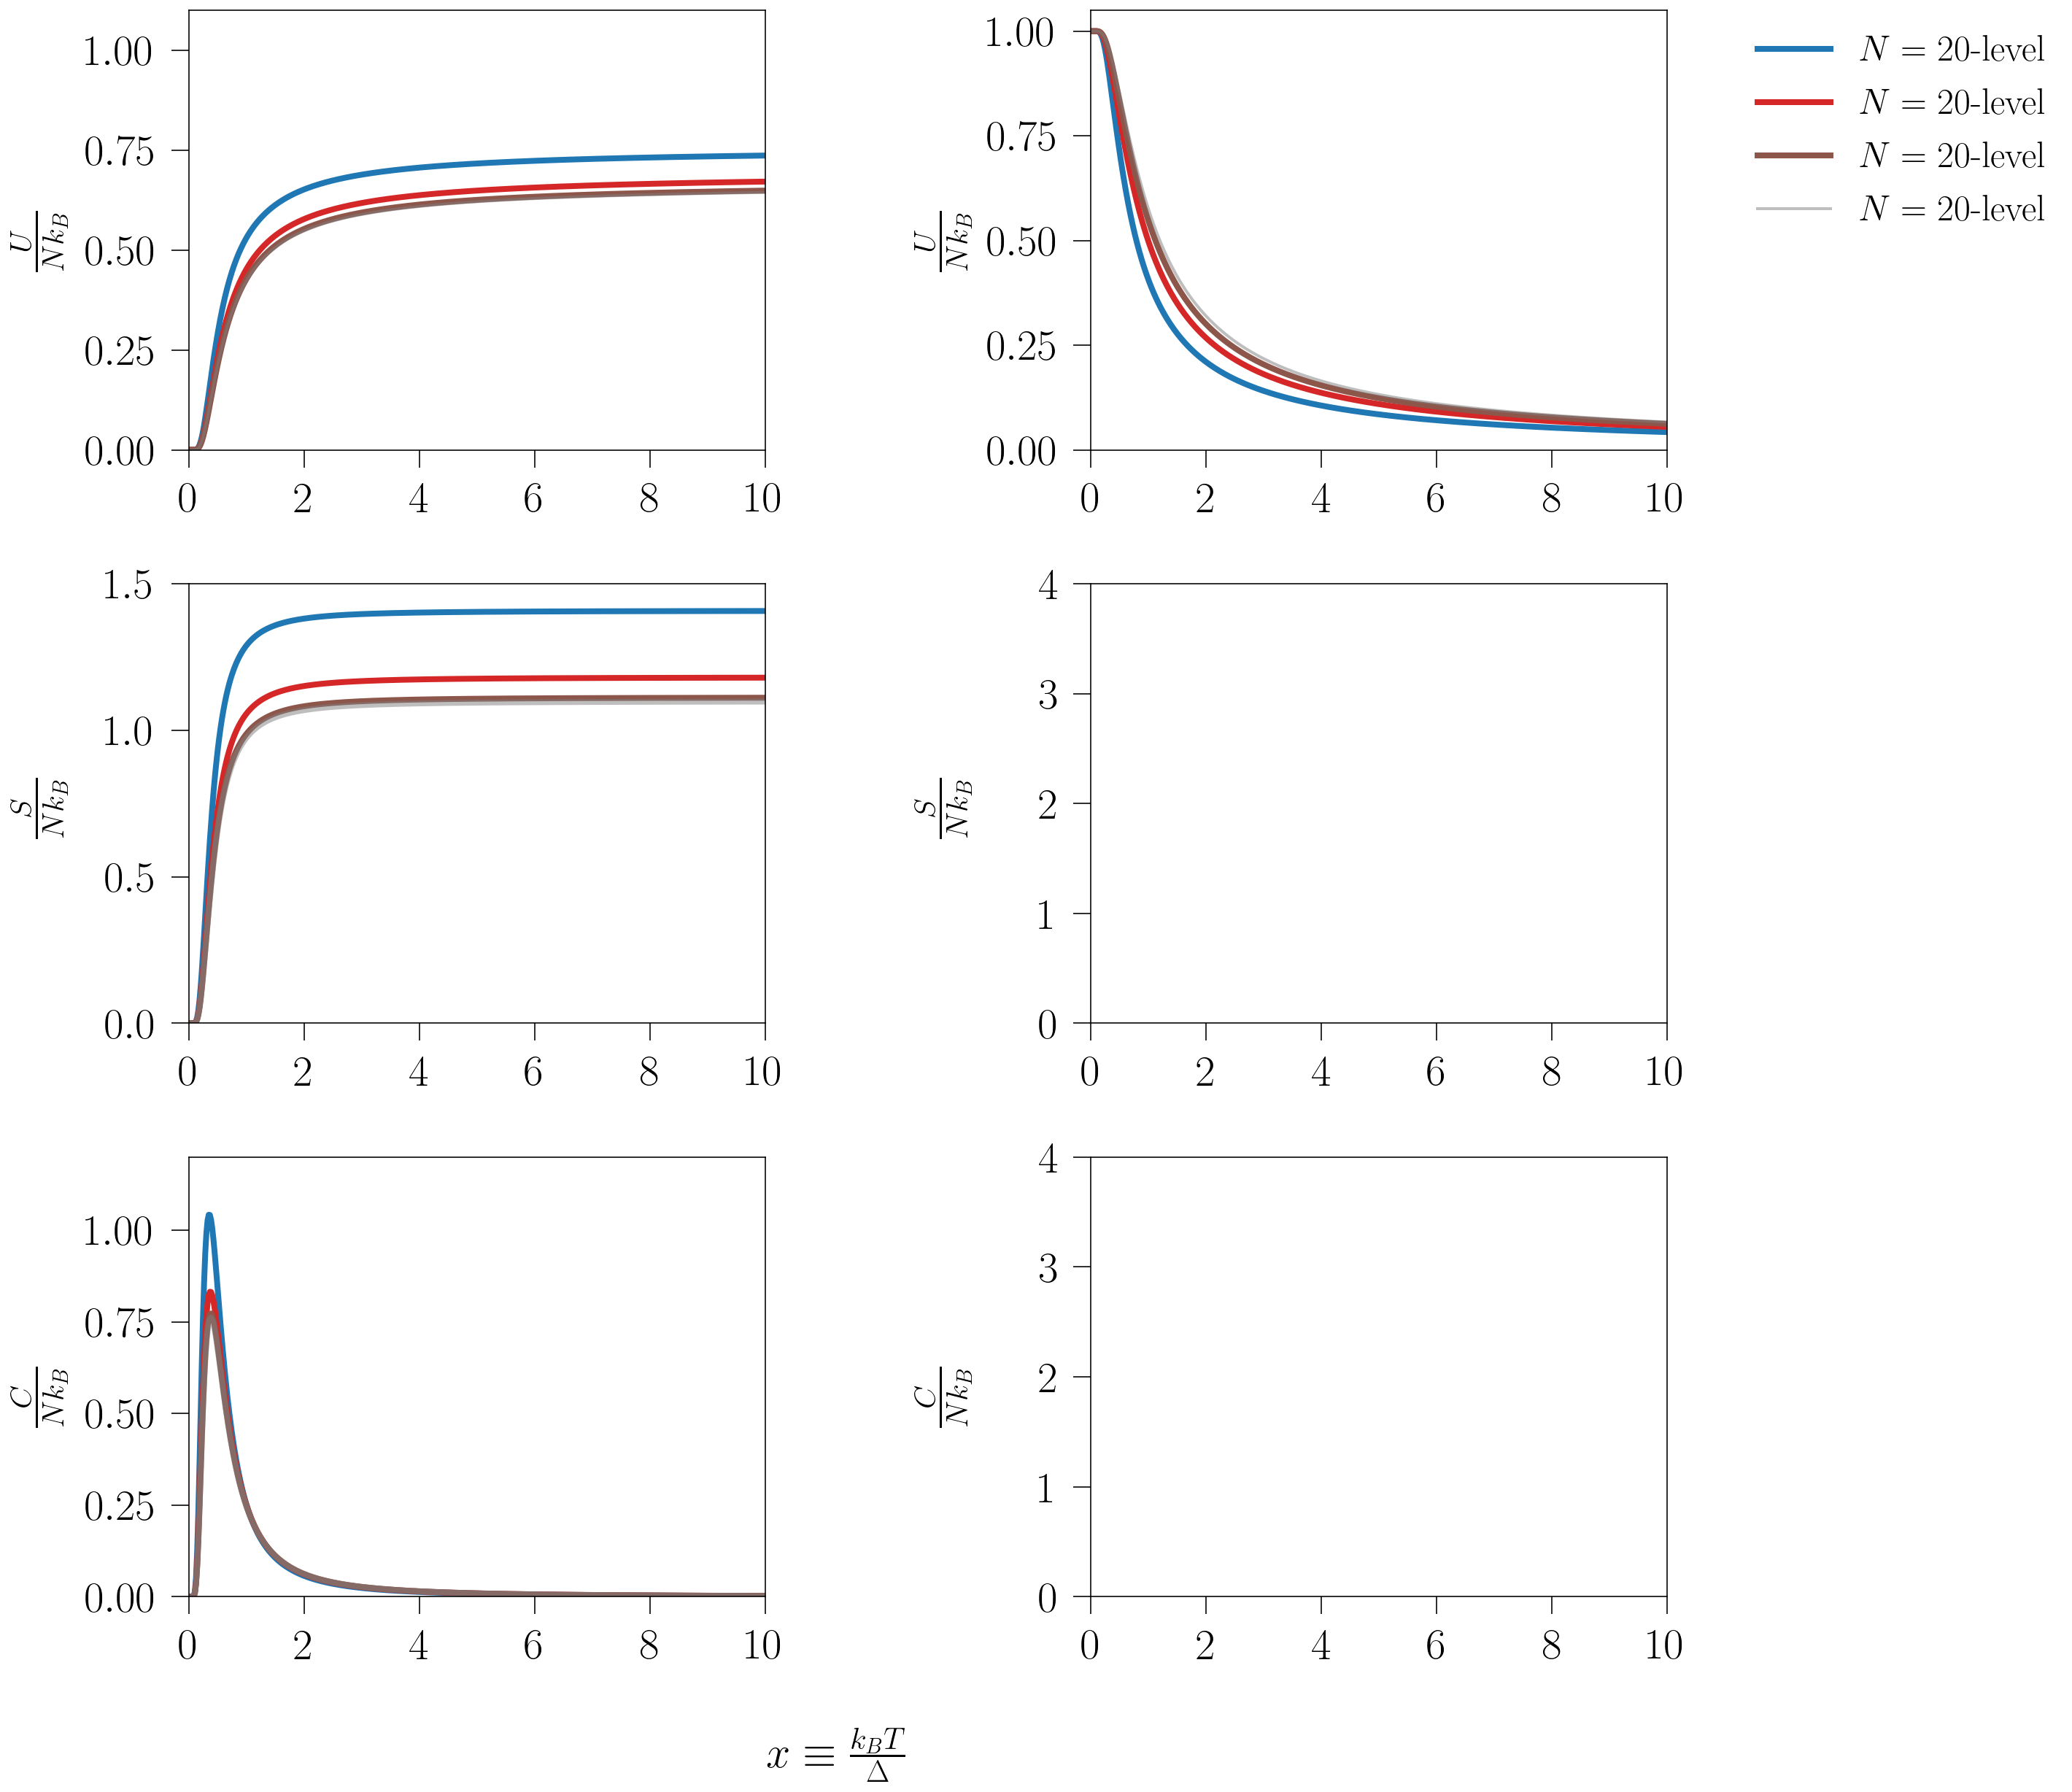

In [29]:
legends_fig_3_level = ['$N=20\\textrm{-level}$', '$N=\\textrm{ }3\\textrm{-level}$', '$2\\textrm{-level}$', '$\\textrm{Harmonic Oscillator}$',]

fig_3_level_save = 'fig_3_level' # name of the file storing the figure
title_fig_3_level   = '' # Title for the figure, if needed

x_axis_label_fig_3_level = '$x\\equiv\\frac{k_{B}T}{\\Delta}$'
y_axis_label_fig_3_level_U = '$\\frac{U}{Nk_{B}}$'
y_axis_label_fig_3_level_S = '$\\frac{S}{Nk_{B}}$'
y_axis_label_fig_3_level_C = '$\\frac{C}{Nk_{B}}$'


x_min_lim_fig_3_level, x_max_lim_fig_3_level = 0.00, 10.00# 390.0
y_min_lim_fig_3_level = 0.00
y_max_lim_fig_3_level = 10.00, 1.00# 8100.0# 

######################################################


fig_3_level = plt.figure(figsize=(20, 20),)# constrained_layout=True)#figsize=(24, 10) and ncols=7, nrows=1


spec_1 = gridspec.GridSpec(ncols=11, nrows=14, figure=fig_3_level)

fig_3_level_ax0 = fig_3_level.add_subplot(spec_1[0:4,0:4])
fig_3_level_ax1 = fig_3_level.add_subplot(spec_1[0:4,6:10])

fig_3_level_ax2 = fig_3_level.add_subplot(spec_1[5:9,0:4])
fig_3_level_ax3 = fig_3_level.add_subplot(spec_1[5:9,6:10])

fig_3_level_ax4 = fig_3_level.add_subplot(spec_1[10:14,0:4])
fig_3_level_ax5 = fig_3_level.add_subplot(spec_1[10:14,6:10])


axes_fig_3_level = [fig_3_level_ax0,fig_3_level_ax1,fig_3_level_ax2,fig_3_level_ax3,fig_3_level_ax4,fig_3_level_ax5]

fig_3_level.text(0.400, 0.05, r'\textrm{%s}' % x_axis_label_fig_3_level, size=30, va='center')#, transform=ax0.transAxes);

fig_3_level.text(0.040, 0.22, r'\textrm{%s}' % y_axis_label_fig_3_level_C, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_3_level.text(0.040, 0.50, r'\textrm{%s}' % y_axis_label_fig_3_level_S, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_3_level.text(0.040, 0.77, r'\textrm{%s}' % y_axis_label_fig_3_level_U, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');

fig_3_level.text(0.47, 0.22, r'\textrm{%s}' % y_axis_label_fig_3_level_C, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_3_level.text(0.47, 0.50, r'\textrm{%s}' % y_axis_label_fig_3_level_S, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_3_level.text(0.47, 0.77, r'\textrm{%s}' % y_axis_label_fig_3_level_U, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');

x_ticks = [float(i) for i in range(0,12,2) ]

for i in axes_fig_3_level:
    i.tick_params(axis='y', labelsize=30, pad=10, length=12)
    i.tick_params(axis='x', labelsize=30, pad=10, length=12, )
    i.set_xticks(x_ticks)
    i.set_xlim(x_min_lim_fig_3_level, x_max_lim_fig_3_level)
    
axes_fig_3_level[0].set_ylim(0.0, 1.1)
axes_fig_3_level[2].set_ylim(y_min_lim_fig_3_level, 1.5)
axes_fig_3_level[4].set_ylim(y_min_lim_fig_3_level, 1.2)
axes_fig_3_level[1].set_ylim(0.0, 1.05)
axes_fig_3_level[3].set_ylim(y_min_lim_fig_3_level,  4.0)
axes_fig_3_level[5].set_ylim(y_min_lim_fig_3_level,  4.0)


warnings.filterwarnings('ignore')
labels_fig_3_level = [r'\textrm{%s}' % i for i in legends_fig_3_level]

axes_fig_3_level[0].plot(kBT_delta, U_1_mag_values(kBT_delta,1.0), lw=4, color=colors_fig[0], label=labels_fig_3_level[0]);
axes_fig_3_level[0].plot(kBT_delta, U_1_mag_values(kBT_delta,2.0), lw=4, color=colors_fig[3], label=labels_fig_3_level[0]);
axes_fig_3_level[0].plot(kBT_delta, U_1_mag_values(kBT_delta,5.0), lw=4, color=colors_fig[5], label=labels_fig_3_level[0]);
axes_fig_3_level[0].plot(kBT_delta, U_1_mag_values(kBT_delta,100.0), lw=2, color=colors_fig[7], alpha=0.5,label=labels_fig_3_level[0]);

axes_fig_3_level[1].plot(kBT_delta, M_1_mag_values(1.0,kBT_delta,), lw=4, color=colors_fig[0]);#, label=labels_fig_3_level[0]);
axes_fig_3_level[1].plot(kBT_delta, M_1_mag_values(2.0,kBT_delta,), lw=4, color=colors_fig[3]);#, label=labels_fig_3_level[0]);
axes_fig_3_level[1].plot(kBT_delta, M_1_mag_values(5.0,kBT_delta,), lw=4, color=colors_fig[5]);#, label=labels_fig_3_level[0]);
axes_fig_3_level[1].plot(kBT_delta, M_1_mag_values(100.0,kBT_delta), lw=2, color=colors_fig[7], alpha=0.5);#, label=labels_fig_3_level[0]);

axes_fig_3_level[2].plot(kBT_delta, S_1_mag_values(kBT_delta,1.0), lw=4, color=colors_fig[0]);#, label=labels_fig_3_level[0]);
axes_fig_3_level[2].plot(kBT_delta, S_1_mag_values(kBT_delta,2.0), lw=4, color=colors_fig[3]);#, label=labels_fig_3_level[0]);
axes_fig_3_level[2].plot(kBT_delta, S_1_mag_values(kBT_delta,5.0), lw=4, color=colors_fig[5]);#, label=labels_fig_3_level[0]);
axes_fig_3_level[2].plot(kBT_delta, S_1_mag_values(kBT_delta,100.0), lw=4, color=colors_fig[7], alpha=0.5);#, label=labels_fig_3_level[0]);

axes_fig_3_level[4].plot(kBT_delta, C_1_mag_values(kBT_delta,1.0), lw=4, color=colors_fig[0]);#, label=labels_fig_3_level[0]);
axes_fig_3_level[4].plot(kBT_delta, C_1_mag_values(kBT_delta,2.0), lw=4, color=colors_fig[3]);#, label=labels_fig_3_level[0]);
axes_fig_3_level[4].plot(kBT_delta, C_1_mag_values(kBT_delta,5.0), lw=4, color=colors_fig[5]);#, label=labels_fig_3_level[0]);
axes_fig_3_level[4].plot(kBT_delta, C_1_mag_values(kBT_delta,100.0), lw=4, color=colors_fig[7], alpha=0.5);#, label=labels_fig_3_level[0]);


#axes_fig_3_level[2].hlines(np.log(20.), kBT_delta[0],kBT_delta[-1], colors='k', linestyles='dashed',);
    
axes_fig_3_level[0].legend(bbox_transform=axes_fig_3_level[0].transAxes, 
               bbox_to_anchor=(3.25, 0.98), 
               ncol=1, borderaxespad=0, frameon=False, fontsize=25);
#axes_fig_3_level[1].legend(bbox_transform=axes_fig_3_level[1].transAxes, 
#               bbox_to_anchor=(1.13, 0.62), 
#               ncol=1, borderaxespad=0, frameon=False, fontsize=25);

#plt.savefig('2kkkkkk.pdf', format='pdf', dpi=180, bbox_inches="tight")



In [ ]:
Nn,Ntotal,n0,n1,n2,n3,n4,kB = symbols('Nn,Ntotal,n0,n1,n2,n3,n4,kB')

In [6]:

def stirling(log_factorial):
    
    return log_factorial*log(log_factorial) - log_factorial

def entropia(N_total,n_levels):
    
    denominator = [stirling(i) for i in n_levels]
    
    print(-kB*(stirling(N_total) - sum(denominator)))
        
    return -kB*(stirling(N_total) - sum(denominator))

In [ ]:
Omega = factorial(Nn)/(factorial(n0)*factorial(n1))

log_Omega = log(factorial(Nn)) - (log(factorial(n0)) + log(factorial(n1)))

Omega_SH = stirling(Nn) - (stirling(n0) + stirling(n1))

Omega_SH

In [ ]:
Omega

In [ ]:
n_levels = [n0,n1]

entropia(Ntotal,n_levels)


# Magnetic system, quantum-mechanically

In [31]:
J = symbols('J')

In [32]:
kBT_delta = np.linspace(1,100000000,2500)/10000000.0

In [33]:
#Z_1_J_mag = (exp( (1.0+(1.0/(2*J)))*(1./x) ) - exp( -(1.0+(1.0/(2*J)))*(1.0/x) ))/(exp(1./(2*J*(1.0/x))) - exp(-1.0/(2*J*(1.0/x))))

Z_1_J_mag = sinh((1.+1.0/(2.0*J))*(1./x)) / sinh((1.0/(2.0*J))*(1./x))

In [34]:
U_1_J_mag =  x**2.0 * log(Z_1_J_mag).diff(x)

S_1_J_mag = (x * log(Z_1_J_mag)).diff(x)

C_1_J_mag = x * (x*log(Z_1_J_mag)).diff(x,2)

M_1_J_mag =  - x**2.0 * log(Z_1_J_mag).diff(x)



M_1_J_mag

-x**2.0*(-1.0*(1.0 + 0.5/J)*cosh(1.0*(1.0 + 0.5/J)/x)/(x**2*sinh(0.5/(J*x))) + 0.5*sinh(1.0*(1.0 + 0.5/J)/x)*cosh(0.5/(J*x))/(J*x**2*sinh(0.5/(J*x))**2))*sinh(0.5/(J*x))/sinh(1.0*(1.0 + 0.5/J)/x)

In [35]:
U_1_J_mag_values = lambdify([x, J], U_1_J_mag, 'numpy')

S_1_J_mag_values = lambdify([x, J], S_1_J_mag, 'numpy')

C_1_J_mag_values = lambdify([x, J], C_1_J_mag, 'numpy')

M_1_J_mag_values = lambdify([x, J], M_1_J_mag, 'numpy')



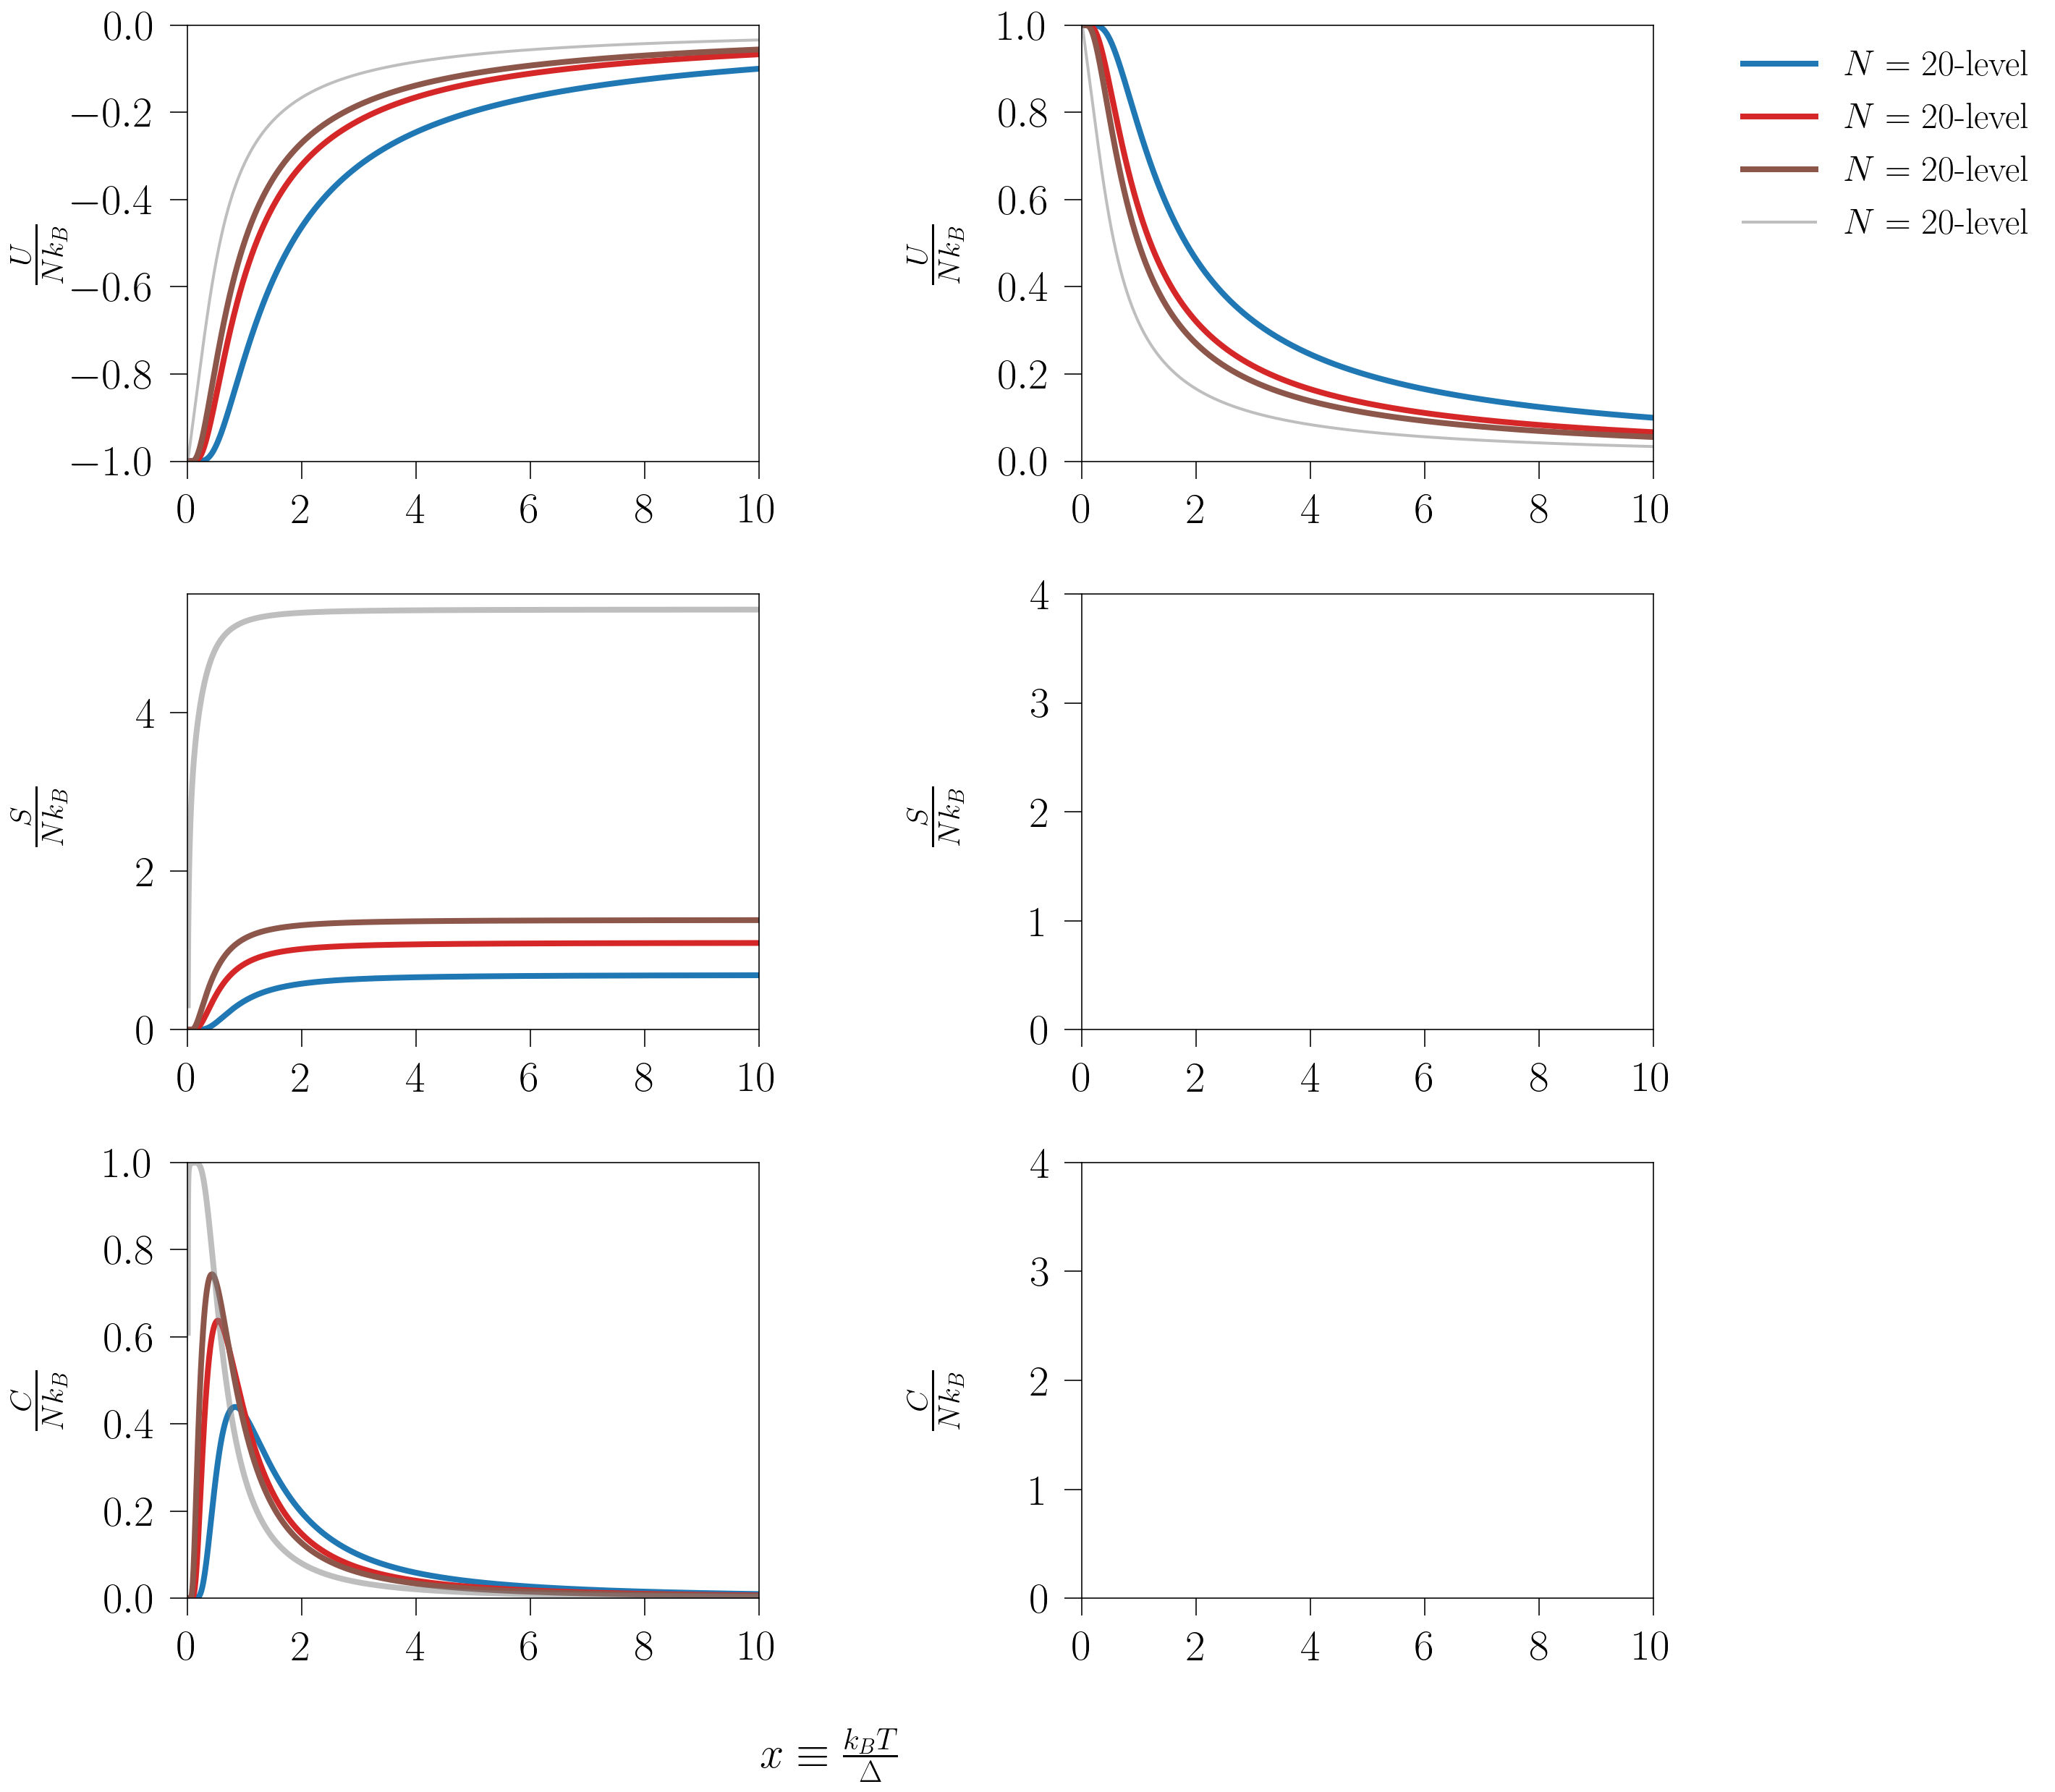

In [36]:
legends_fig_J_mag = ['$N=20\\textrm{-level}$', '$N=\\textrm{ }3\\textrm{-level}$', '$2\\textrm{-level}$', '$\\textrm{Harmonic Oscillator}$',]

fig_J_mag_save = 'fig_J_mag' # name of the file storing the figure
title_fig_J_mag   = '' # Title for the figure, if needed

x_axis_label_fig_J_mag = '$x\\equiv\\frac{k_{B}T}{\\Delta}$'
y_axis_label_fig_J_mag_U = '$\\frac{U}{Nk_{B}}$'
y_axis_label_fig_J_mag_S = '$\\frac{S}{Nk_{B}}$'
y_axis_label_fig_J_mag_C = '$\\frac{C}{Nk_{B}}$'


x_min_lim_fig_J_mag, x_max_lim_fig_J_mag = 0.00, 10.00# 390.0
y_min_lim_fig_J_mag = 0.00
y_max_lim_fig_J_mag = 10.00, 1.00# 8100.0# 

######################################################


fig_J_mag = plt.figure(figsize=(20, 20),)# constrained_layout=True)#figsize=(24, 10) and ncols=7, nrows=1


spec_1 = gridspec.GridSpec(ncols=11, nrows=14, figure=fig_J_mag)

fig_J_mag_ax0 = fig_J_mag.add_subplot(spec_1[0:4,0:4])
fig_J_mag_ax1 = fig_J_mag.add_subplot(spec_1[0:4,6:10])

fig_J_mag_ax2 = fig_J_mag.add_subplot(spec_1[5:9,0:4])
fig_J_mag_ax3 = fig_J_mag.add_subplot(spec_1[5:9,6:10])

fig_J_mag_ax4 = fig_J_mag.add_subplot(spec_1[10:14,0:4])
fig_J_mag_ax5 = fig_J_mag.add_subplot(spec_1[10:14,6:10])


axes_fig_J_mag = [fig_J_mag_ax0,fig_J_mag_ax1,fig_J_mag_ax2,fig_J_mag_ax3,fig_J_mag_ax4,fig_J_mag_ax5]

fig_J_mag.text(0.400, 0.05, r'\textrm{%s}' % x_axis_label_fig_J_mag, size=30, va='center')#, transform=ax0.transAxes);

fig_J_mag.text(0.040, 0.22, r'\textrm{%s}' % y_axis_label_fig_J_mag_C, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_J_mag.text(0.040, 0.50, r'\textrm{%s}' % y_axis_label_fig_J_mag_S, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_J_mag.text(0.040, 0.77, r'\textrm{%s}' % y_axis_label_fig_J_mag_U, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');

fig_J_mag.text(0.47, 0.22, r'\textrm{%s}' % y_axis_label_fig_J_mag_C, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_J_mag.text(0.47, 0.50, r'\textrm{%s}' % y_axis_label_fig_J_mag_S, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');
fig_J_mag.text(0.47, 0.77, r'\textrm{%s}' % y_axis_label_fig_J_mag_U, size=30, va='center', rotation='vertical')#, transform=ax0.transAxes); #rotation='vertical');

x_ticks = [float(i) for i in range(0,12,2) ]

for i in axes_fig_J_mag:
    i.tick_params(axis='y', labelsize=30, pad=10, length=12)
    i.tick_params(axis='x', labelsize=30, pad=10, length=12, )
    i.set_xticks(x_ticks)
    i.set_xlim(x_min_lim_fig_J_mag, x_max_lim_fig_J_mag)
    
axes_fig_J_mag[0].set_ylim(-1.0, 0.0)
axes_fig_J_mag[2].set_ylim(y_min_lim_fig_J_mag, 5.5)
axes_fig_J_mag[4].set_ylim(y_min_lim_fig_J_mag, 1.0)
axes_fig_J_mag[1].set_ylim(0.0, 1.00)
#axes_fig_J_mag[1].set_xlim(0.00, 0.15)
axes_fig_J_mag[3].set_ylim(y_min_lim_fig_J_mag,  4.0)
axes_fig_J_mag[5].set_ylim(y_min_lim_fig_J_mag,  4.0)


warnings.filterwarnings('ignore')
labels_fig_J_mag = [r'\textrm{%s}' % i for i in legends_fig_J_mag]

axes_fig_J_mag[0].plot(kBT_delta, U_1_J_mag_values(kBT_delta,0.5), lw=4, color=colors_fig[0], label=labels_fig_J_mag[0]);
axes_fig_J_mag[0].plot(kBT_delta, U_1_J_mag_values(kBT_delta,1.0), lw=4, color=colors_fig[3], label=labels_fig_J_mag[0]);
axes_fig_J_mag[0].plot(kBT_delta, U_1_J_mag_values(kBT_delta,1.5), lw=4, color=colors_fig[5], label=labels_fig_J_mag[0]);
axes_fig_J_mag[0].plot(kBT_delta, U_1_J_mag_values(kBT_delta,100.0), lw=2, color=colors_fig[7], alpha=0.5,label=labels_fig_J_mag[0]);

axes_fig_J_mag[1].plot(kBT_delta, M_1_J_mag_values(kBT_delta,0.5),  lw=4, color=colors_fig[0]);#, label=labels_fig_J_mag[0]);
axes_fig_J_mag[1].plot(kBT_delta, M_1_J_mag_values(kBT_delta,1.0),  lw=4, color=colors_fig[3]);#, label=labels_fig_J_mag[0]);
axes_fig_J_mag[1].plot(kBT_delta, M_1_J_mag_values(kBT_delta,1.5),  lw=4, color=colors_fig[5]);#, label=labels_fig_J_mag[0]);
axes_fig_J_mag[1].plot(kBT_delta, M_1_J_mag_values(kBT_delta,100.0), lw=2, color=colors_fig[7], alpha=0.5);#, label=labels_fig_J_mag[0]);

axes_fig_J_mag[2].plot(kBT_delta, S_1_J_mag_values(kBT_delta,0.5), lw=4, color=colors_fig[0]);#, label=labels_fig_J_mag[0]);
axes_fig_J_mag[2].plot(kBT_delta, S_1_J_mag_values(kBT_delta,1.0), lw=4, color=colors_fig[3]);#, label=labels_fig_J_mag[0]);
axes_fig_J_mag[2].plot(kBT_delta, S_1_J_mag_values(kBT_delta,1.5), lw=4, color=colors_fig[5]);#, label=labels_fig_J_mag[0]);
axes_fig_J_mag[2].plot(kBT_delta, S_1_J_mag_values(kBT_delta,100.0), lw=4, color=colors_fig[7], alpha=0.5);#, label=labels_fig_J_mag[0]);

axes_fig_J_mag[4].plot(kBT_delta, C_1_J_mag_values(kBT_delta,0.5), lw=4, color=colors_fig[0]);#, label=labels_fig_J_mag[0]);
axes_fig_J_mag[4].plot(kBT_delta, C_1_J_mag_values(kBT_delta,1.0), lw=4, color=colors_fig[3]);#, label=labels_fig_J_mag[0]);
axes_fig_J_mag[4].plot(kBT_delta, C_1_J_mag_values(kBT_delta,1.5), lw=4, color=colors_fig[5]);#, label=labels_fig_J_mag[0]);
axes_fig_J_mag[4].plot(kBT_delta, C_1_J_mag_values(kBT_delta,100.0), lw=4, color=colors_fig[7], alpha=0.5);#, label=labels_fig_J_mag[0]);


#axes_fig_J_mag[2].hlines(np.log(20.), kBT_delta[0],kBT_delta[-1], colors='k', linestyles='dashed',);
    
axes_fig_J_mag[0].legend(bbox_transform=axes_fig_J_mag[0].transAxes, 
               bbox_to_anchor=(3.25, 0.98), 
               ncol=1, borderaxespad=0, frameon=False, fontsize=25);
#axes_fig_J_mag[1].legend(bbox_transform=axes_fig_J_mag[1].transAxes, 
#               bbox_to_anchor=(1.13, 0.62), 
#               ncol=1, borderaxespad=0, frameon=False, fontsize=25);

#plt.savefig('2kkkkkk.pdf', format='pdf', dpi=180, bbox_inches="tight")



# 2-level system by microcanonical

In [7]:

def stirling(log_factorial):
    
    return log_factorial*log(log_factorial) - log_factorial

def entropia(N_total,n_levels):
    
    denominator = [stirling(i) for i in n_levels]
    
    print(-kB*(stirling(N_total) - sum(denominator)))
        
    return -kB*(stirling(N_total) - sum(denominator))

In [8]:
NTotal,nUp,nDown,energy,mg,a,Tinv,kB = symbols('NTotal,nUp,nDown,energy,mg,a,Tinv,kB')

In [9]:
nUp = NTotal*(1.0/2.0 + (energy/NTotal)/(2.0*mg*a))

nDown = NTotal*(1.0/2.0 - (energy/NTotal)/(2.0*mg*a))

In [10]:
S_2_level_micro =  kB * ( stirling(NTotal) - ( stirling(nUp) + stirling(nDown) ) )


S_2_level_micro

kB*(-NTotal*(0.5 - 0.5*energy/(NTotal*a*mg))*log(NTotal*(0.5 - 0.5*energy/(NTotal*a*mg))) + NTotal*(0.5 - 0.5*energy/(NTotal*a*mg)) - NTotal*(0.5 + 0.5*energy/(NTotal*a*mg))*log(NTotal*(0.5 + 0.5*energy/(NTotal*a*mg))) + NTotal*(0.5 + 0.5*energy/(NTotal*a*mg)) + NTotal*log(NTotal) - NTotal)

In [15]:
Eq(Tinv - S_2_level_micro.diff(energy),0)

Eq(Tinv - kB*(0.5*log(NTotal*(0.5 - 0.5*energy/(NTotal*a*mg)))/(a*mg) - 0.5*log(NTotal*(0.5 + 0.5*energy/(NTotal*a*mg)))/(a*mg)), 0)

In [19]:
energy_T = solve(Eq(Tinv - S_2_level_micro.diff(energy)), exclude=[NTotal,nUp,nDown,mg,a,kB])
                
simplify(energy_T[0])

0.5*kB*(log(NTotal - energy/(a*mg)) - log(NTotal + energy/(a*mg)))/(a*mg)

In [18]:
print(energy_T[0])

0.5*kB*(log(NTotal - energy/(a*mg)) - log(NTotal + energy/(a*mg)))/(a*mg)
